In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv("updated_pollution_dataset.csv")

In [3]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
df.shape

(5000, 10)

In [5]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
df['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [8]:
X = df.drop(columns='Air Quality')
y = df['Air Quality']
X.shape , y.shape

((5000, 9), (5000,))

In [9]:
def All_plot(X):
    col = X.columns
    for column in col:
        if np.issubdtype(X[column].dtype, np.number):  # Check if the column is numeric
            fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # 3 plots in a row
            
            skewness = X[column].skew()
            
            # Determine skewness type
            if skewness > 0:
                skew_type = "Positive Skewness"
            elif skewness < 0:
                skew_type = "Negative Skewness"
            else:
                skew_type = "Approximately Symmetrical"
            
            print(f"{column}: Skewness = {skewness:.2f} ({skew_type})")
            
            # KDE plot
            sns.kdeplot(X[column].dropna(), fill=True, color='blue', alpha=0.5, ax=axes[0])
            axes[0].set_title(f"KDE Plot for {column}\n(Skewness: {skewness:.2f}) ({skew_type})", fontsize=12)
            axes[0].set_xlabel(column)
            axes[0].set_ylabel('Density')
            axes[0].grid(alpha=0.3)
        
            # Q-Q plot
            stats.probplot(X[column].dropna(), dist="norm", plot=axes[1])
            axes[1].set_title(f"Q-Q Plot for {column}", fontsize=12)
            
            # Boxplot
            sns.boxplot(x=X[column], ax=axes[2])
            axes[2].set_title(f"Boxplot for {column}", fontsize=12)
            axes[2].set_xlabel(column)
            
            plt.tight_layout()
            plt.show()

Temperature: Skewness = 0.75 (Positive Skewness)


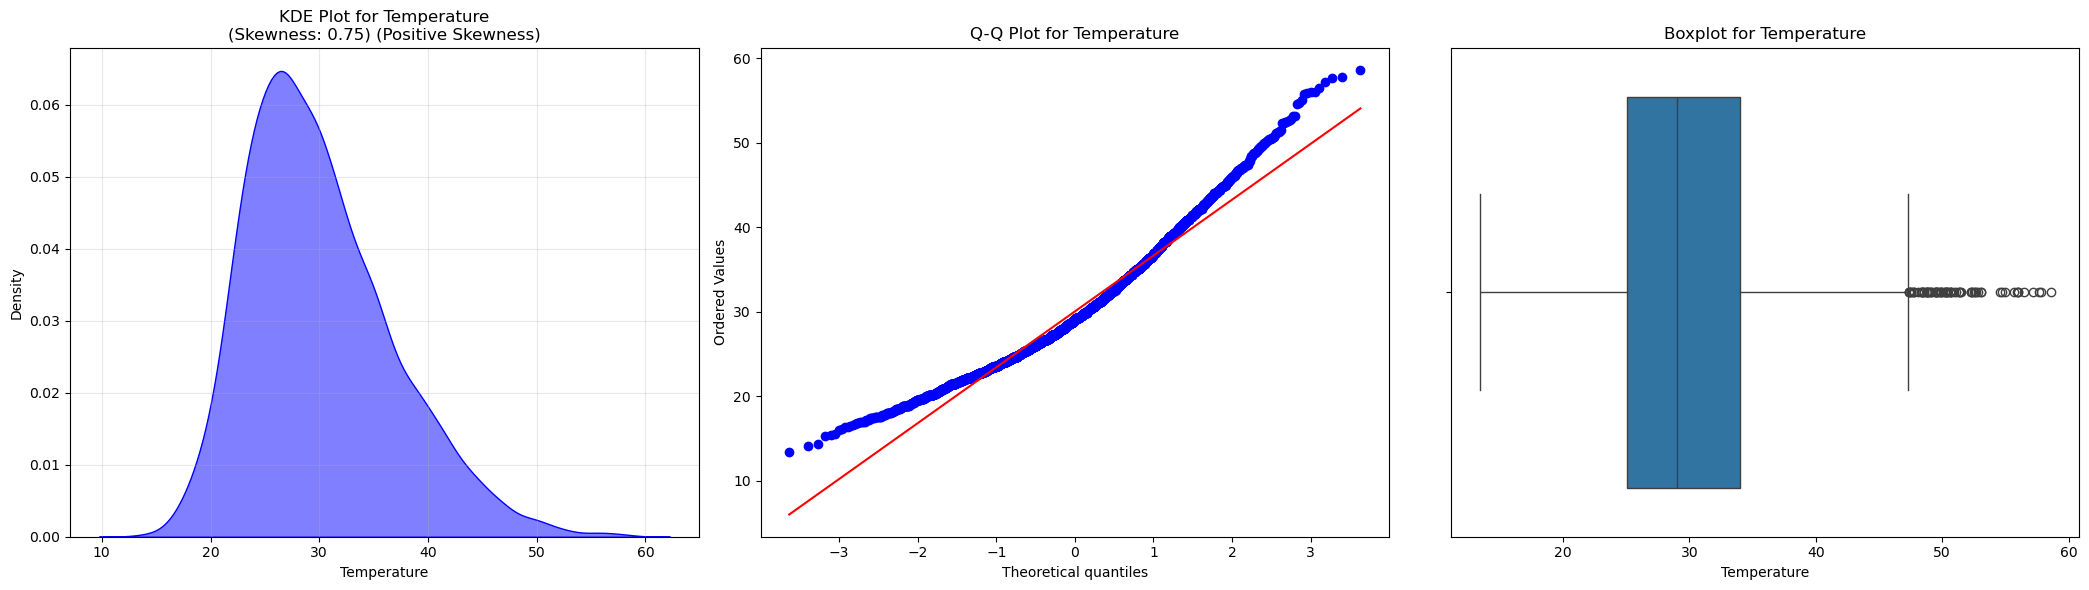

Humidity: Skewness = 0.28 (Positive Skewness)


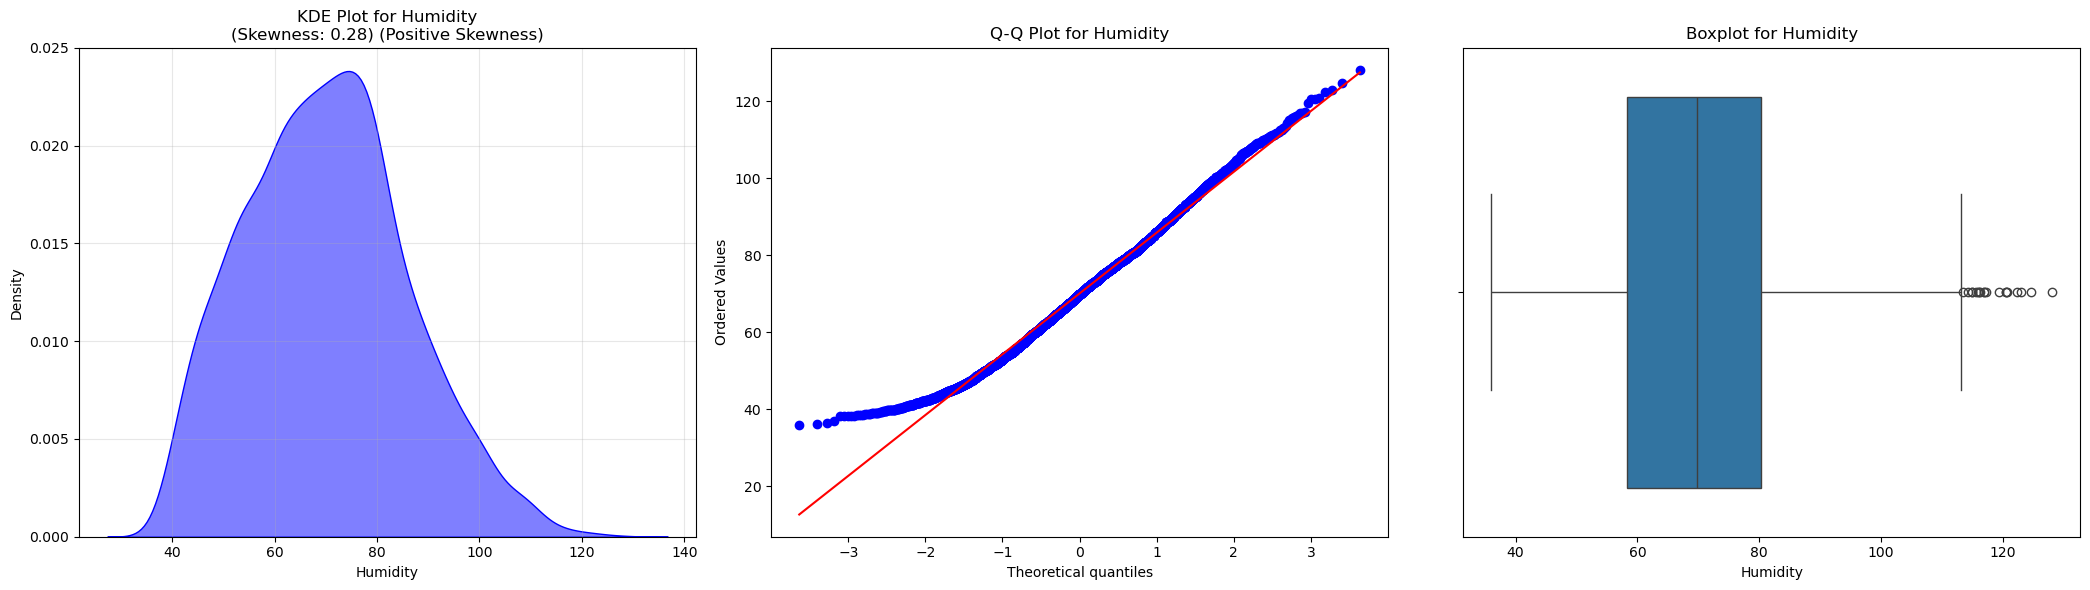

PM2.5: Skewness = 2.89 (Positive Skewness)


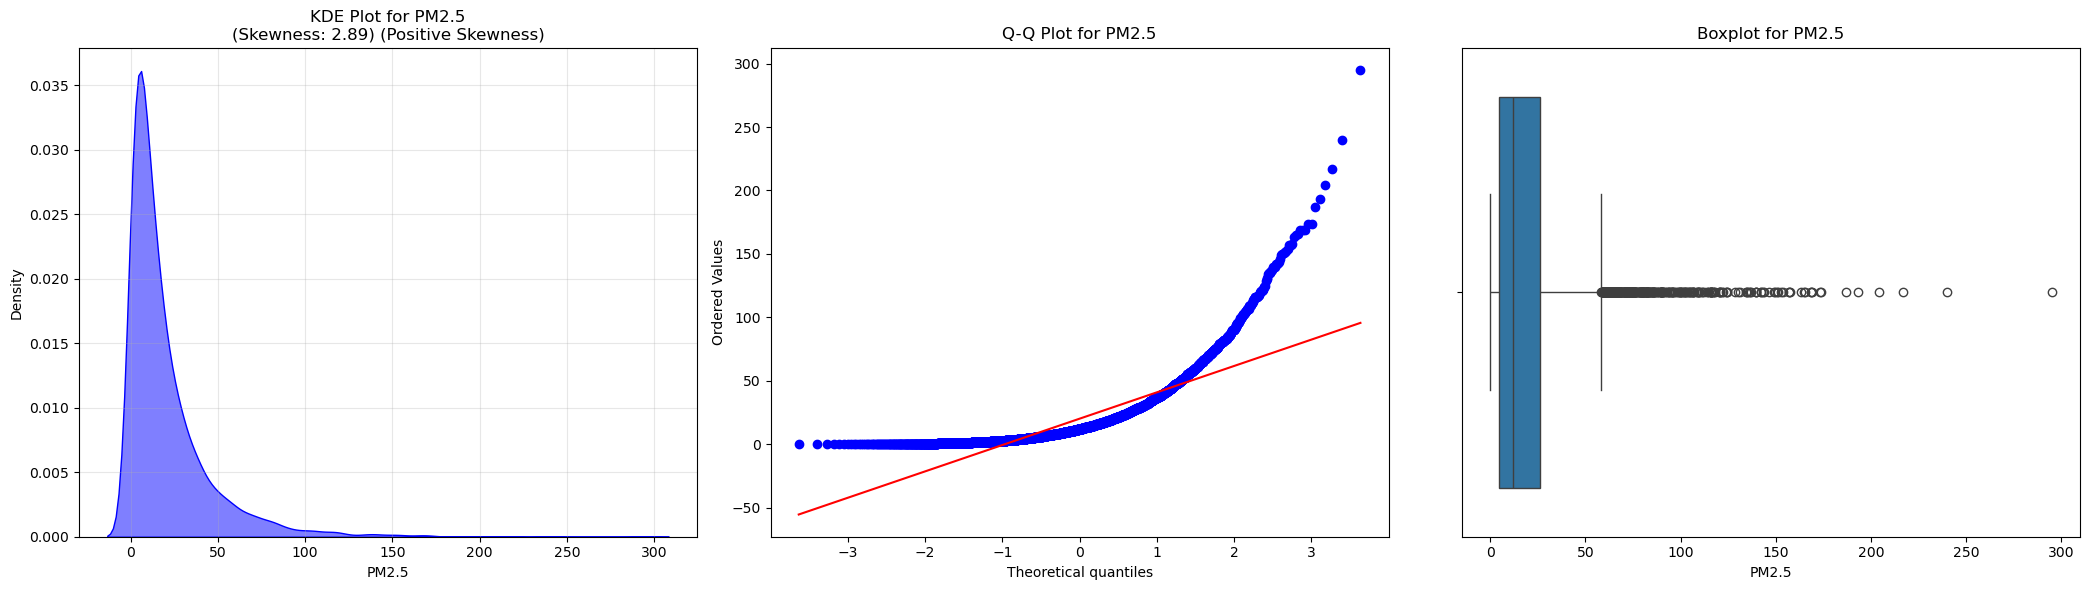

PM10: Skewness = 2.53 (Positive Skewness)


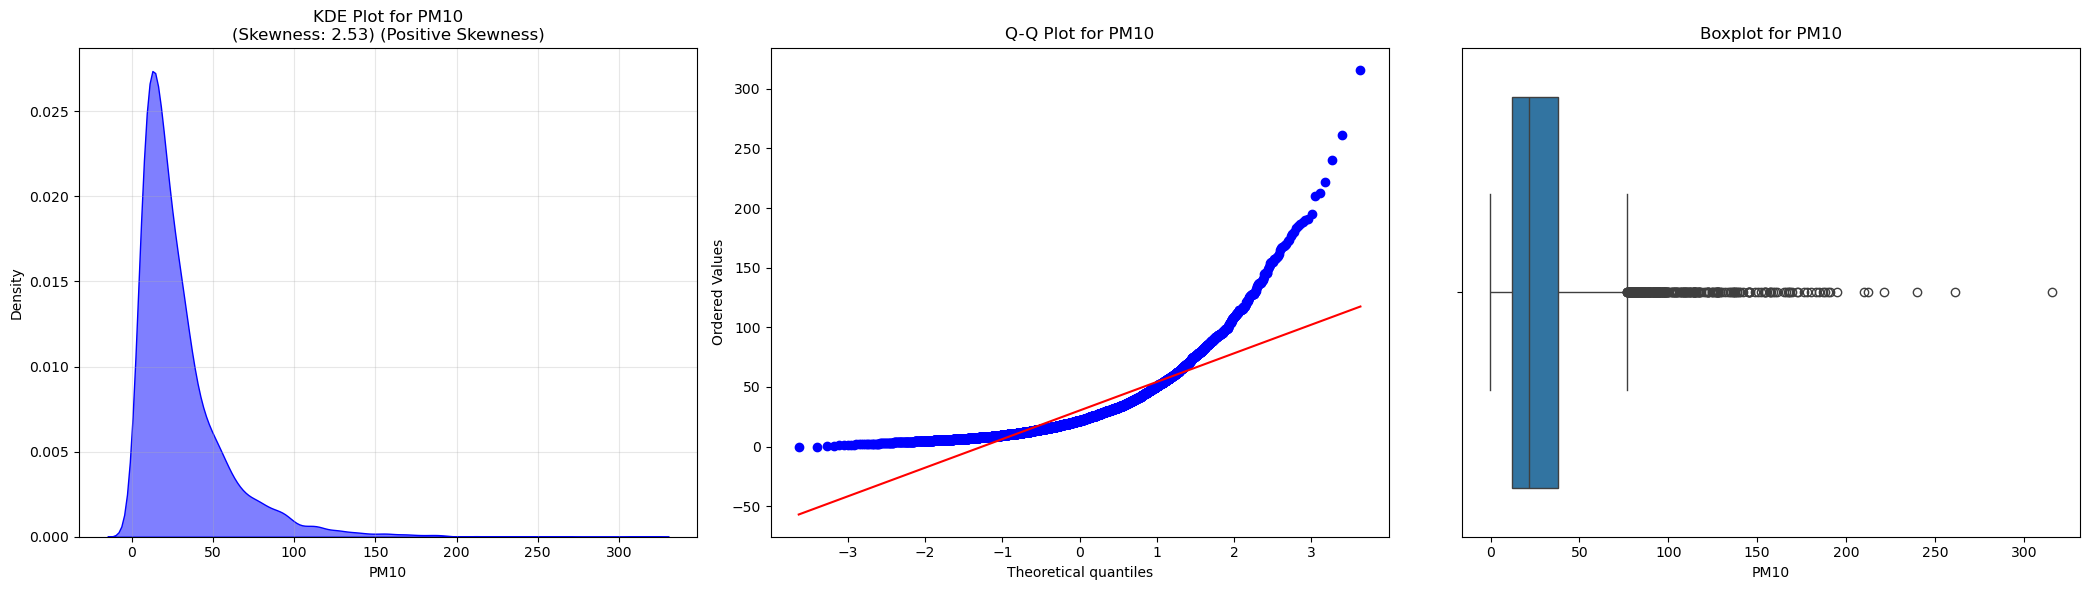

NO2: Skewness = 0.64 (Positive Skewness)


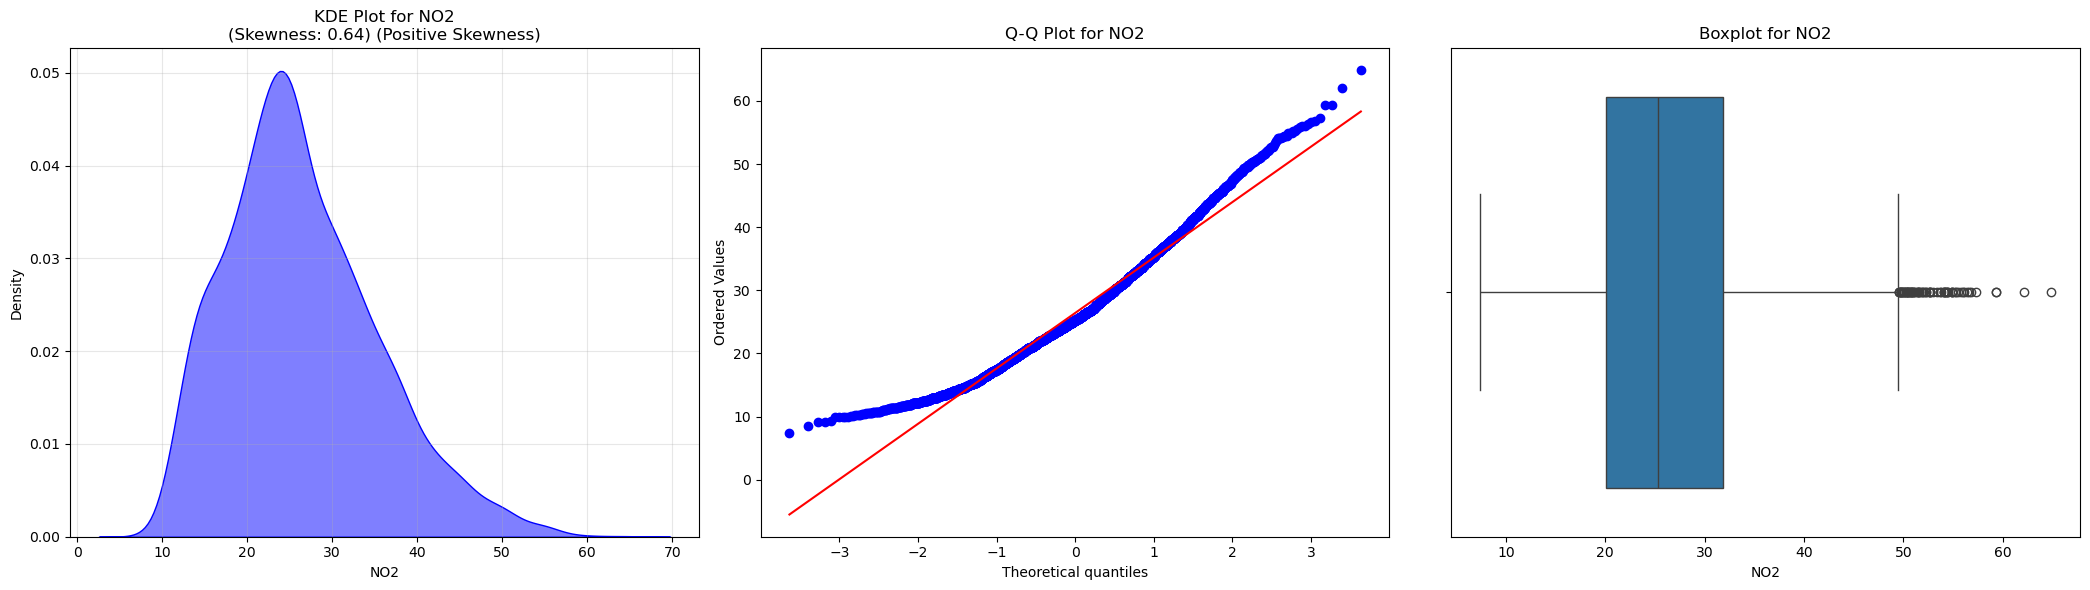

SO2: Skewness = 1.17 (Positive Skewness)


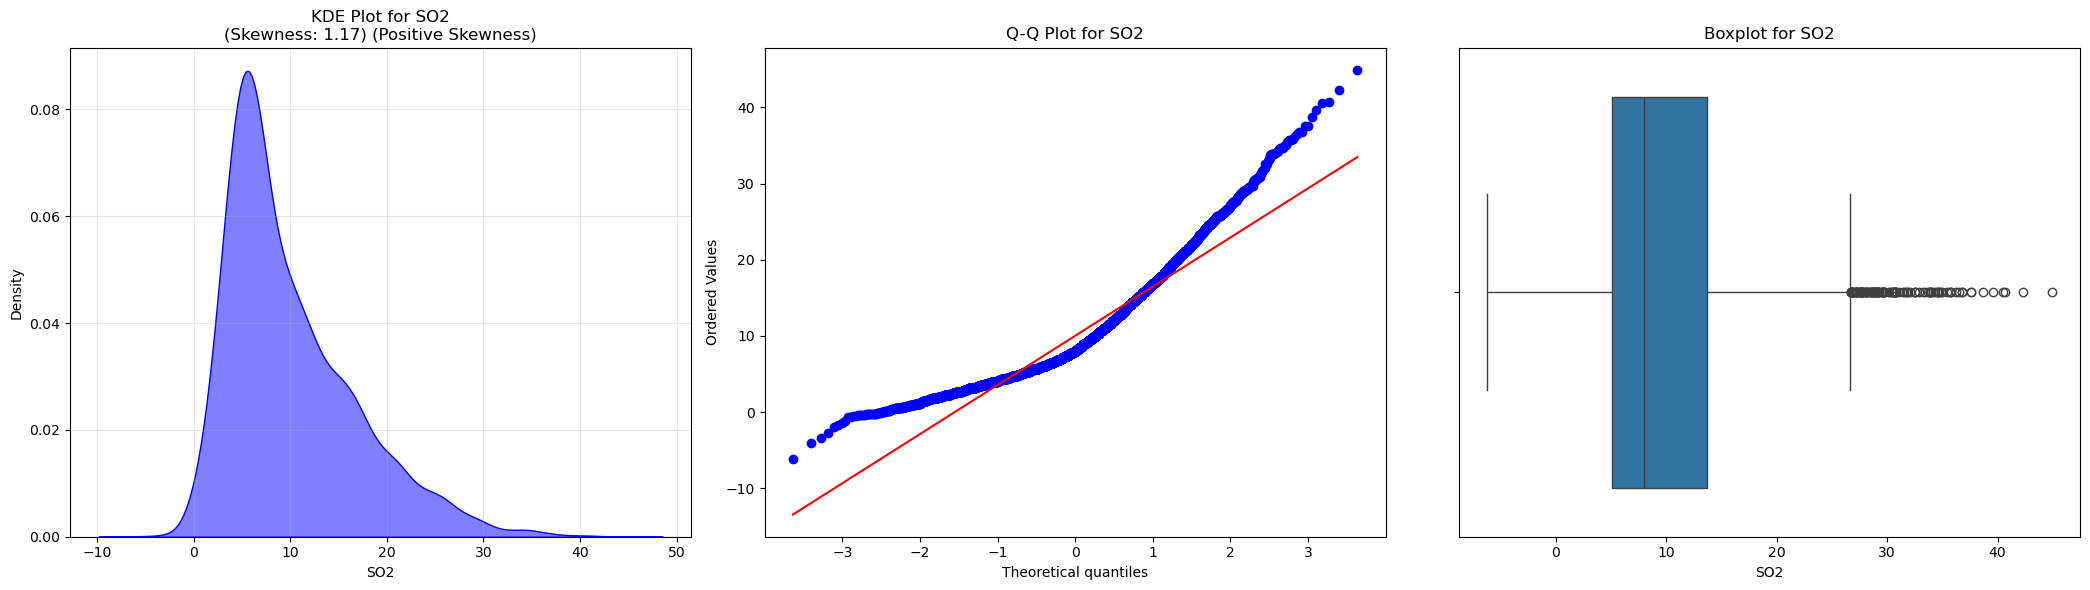

CO: Skewness = 0.88 (Positive Skewness)


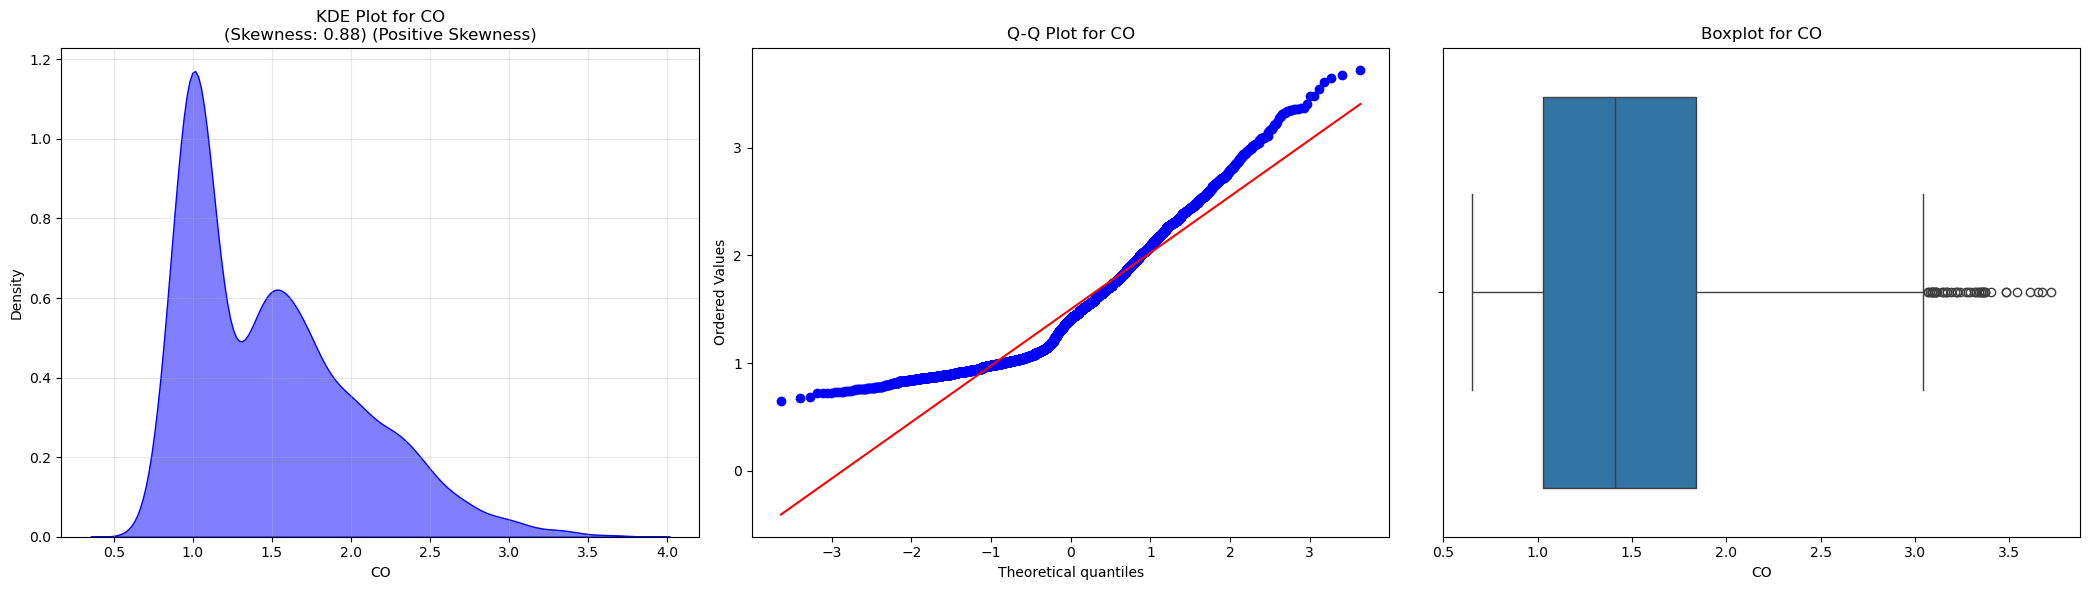

Proximity_to_Industrial_Areas: Skewness = 0.47 (Positive Skewness)


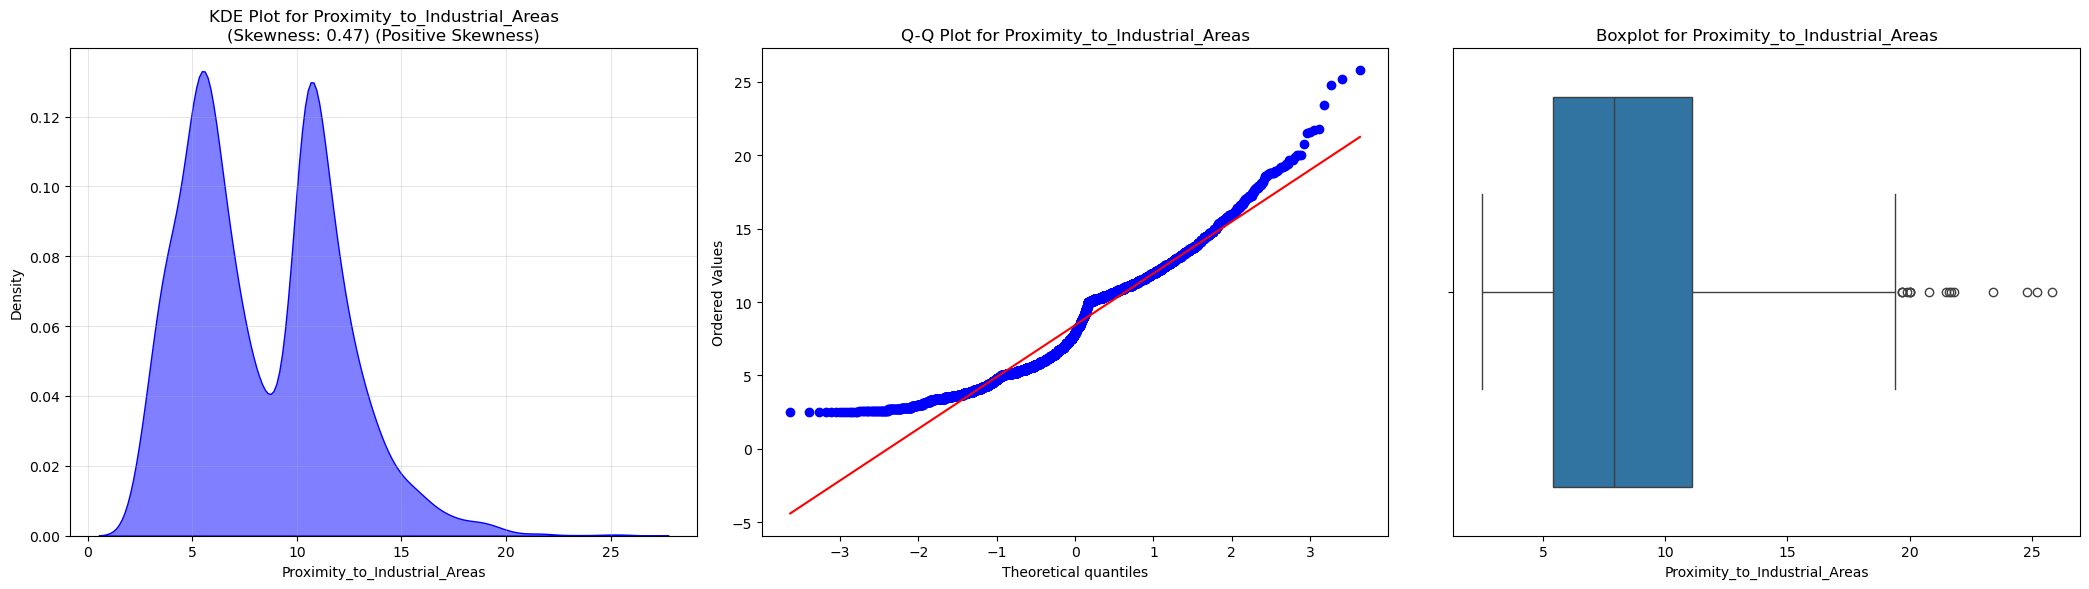

Population_Density: Skewness = 0.20 (Positive Skewness)


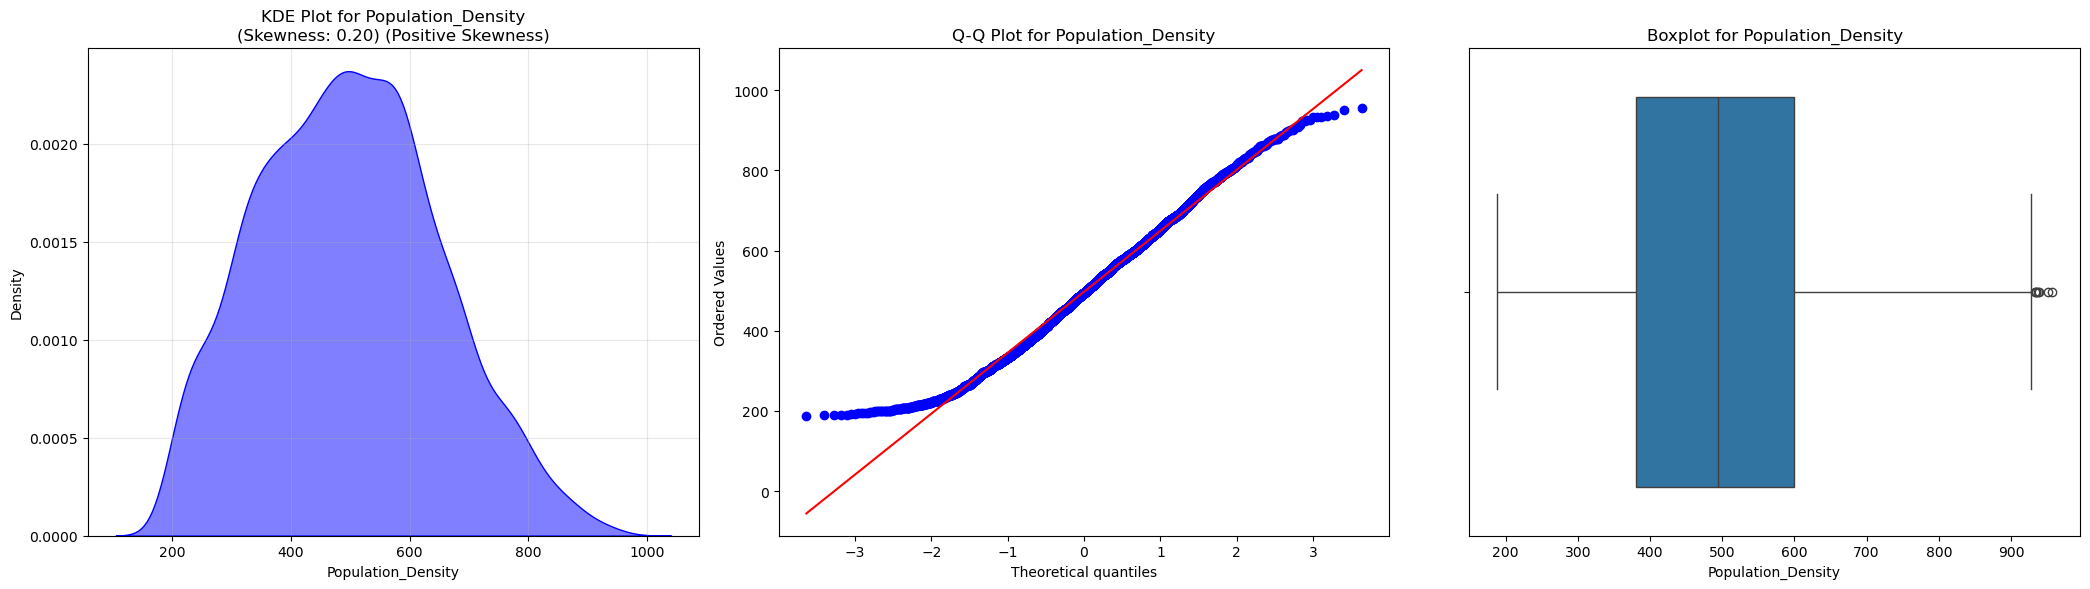

In [10]:
All_plot(X)

In [11]:
# Applying Box-Cox Transform
pt = PowerTransformer(standardize=False)
X_tr = pt.fit_transform(X)
X_trd = pd.DataFrame(X_tr,index=X.index,columns=X.columns)
pd.DataFrame({'cols':X.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Temperature,-0.324050
1,Humidity,0.430733
2,PM2.5,0.043470
3,PM10,-0.034002
4,NO2,0.202860
5,SO2,0.434705
6,CO,-1.344910
7,Proximity_to_Industrial_Areas,0.269165
8,Population_Density,0.641984


In [12]:
X_trd.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,2.069641,11.230647,1.898856,2.797068,4.113002,4.012781,0.549968,2.628726,61.645973
1,2.053064,12.723359,1.225448,2.470271,5.015063,4.145492,0.542038,2.557473,94.277684
2,1.985557,12.646962,3.573179,3.343772,4.571906,4.853780,0.541007,2.355880,95.080059
3,2.038972,9.063016,2.046023,1.922181,3.550549,2.819740,0.477957,3.553046,88.134998
4,2.031624,12.301006,2.162557,2.701023,4.374282,2.924336,0.452784,3.800113,59.598604


Temperature: Skewness = 0.00 (Positive Skewness)


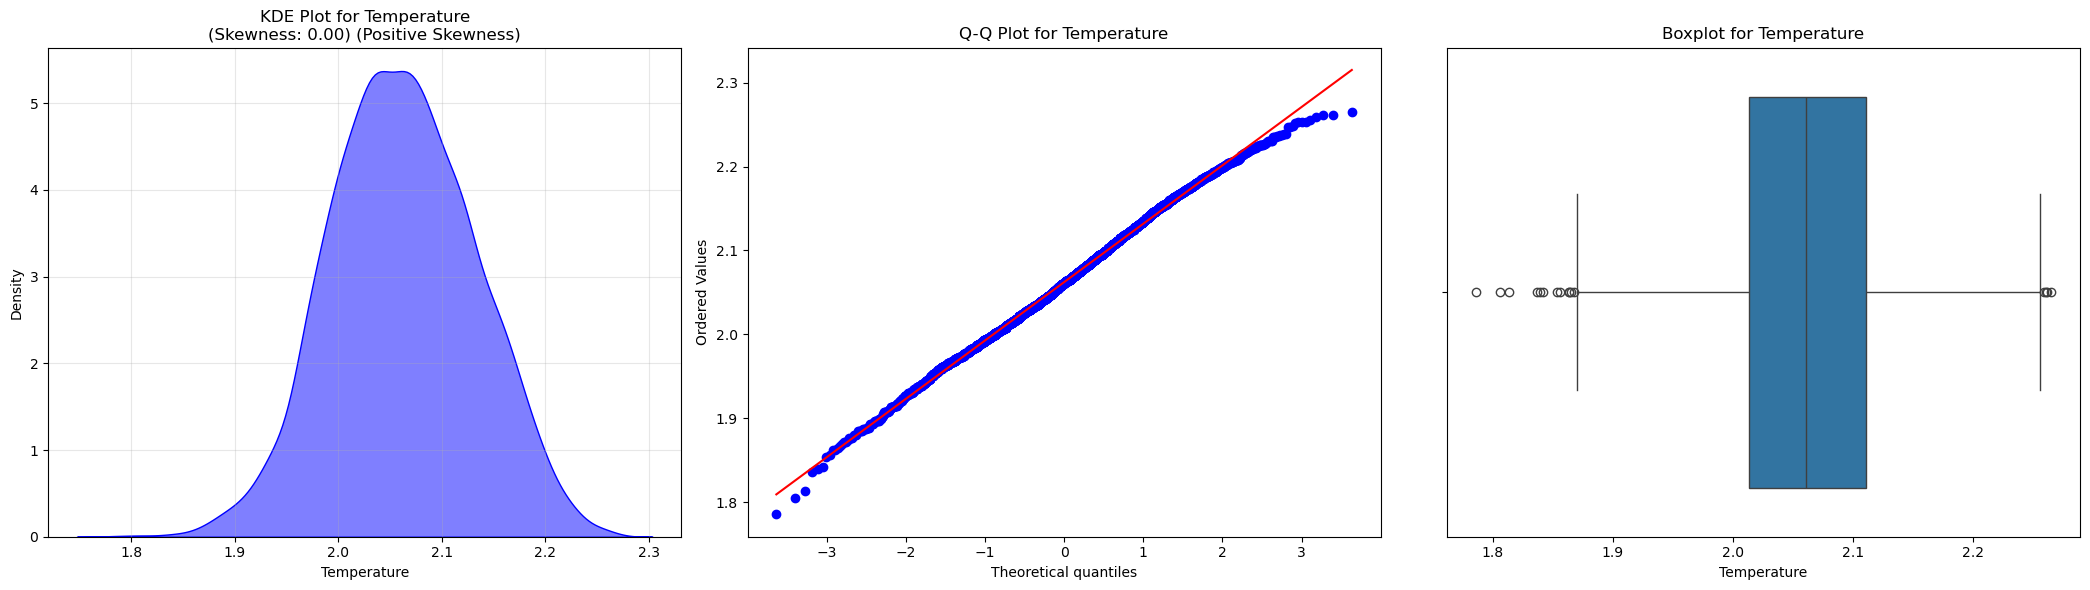

Humidity: Skewness = -0.02 (Negative Skewness)


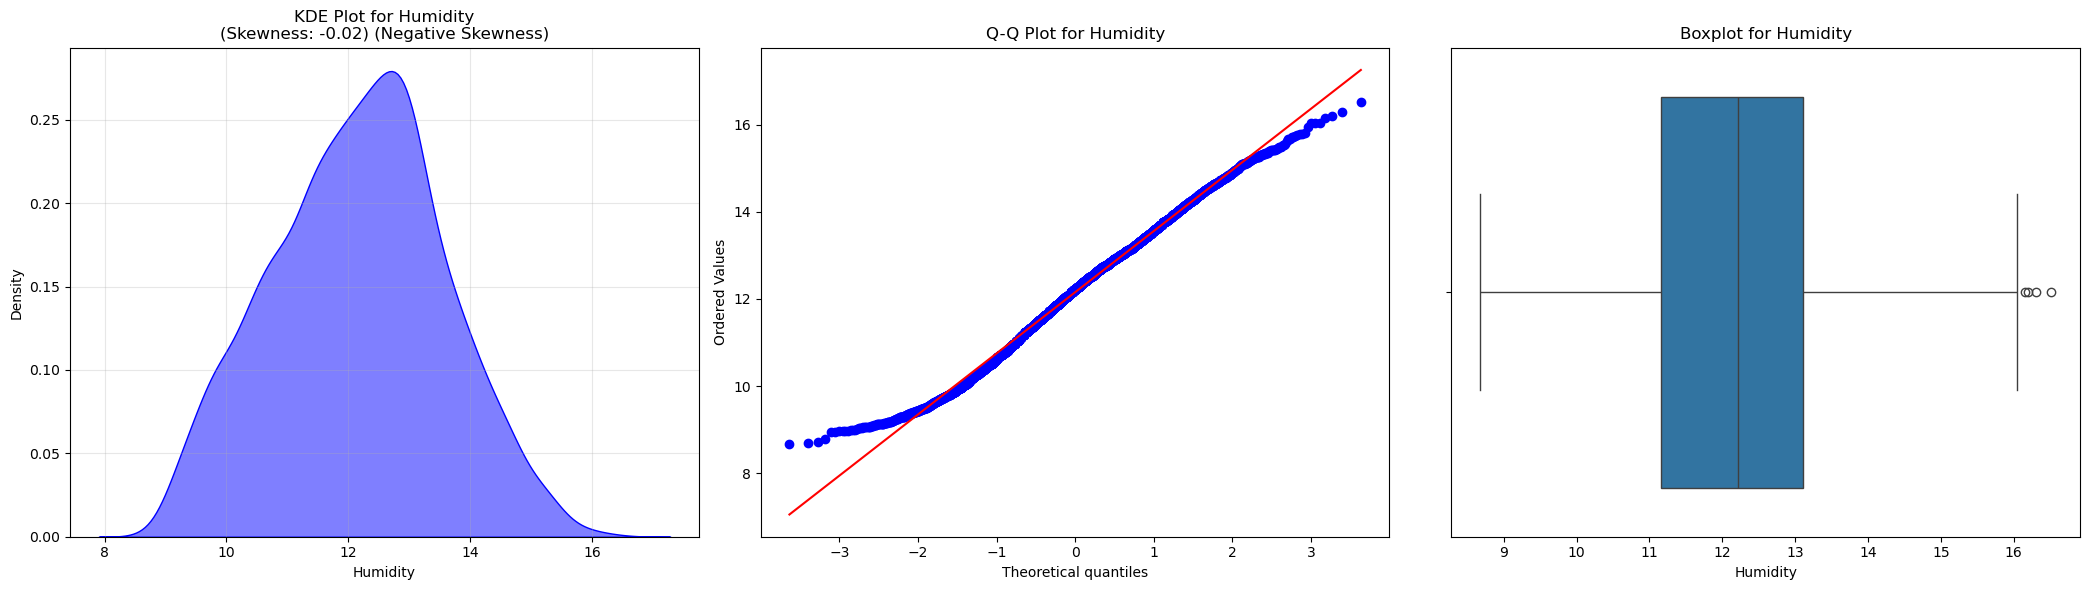

PM2.5: Skewness = -0.01 (Negative Skewness)


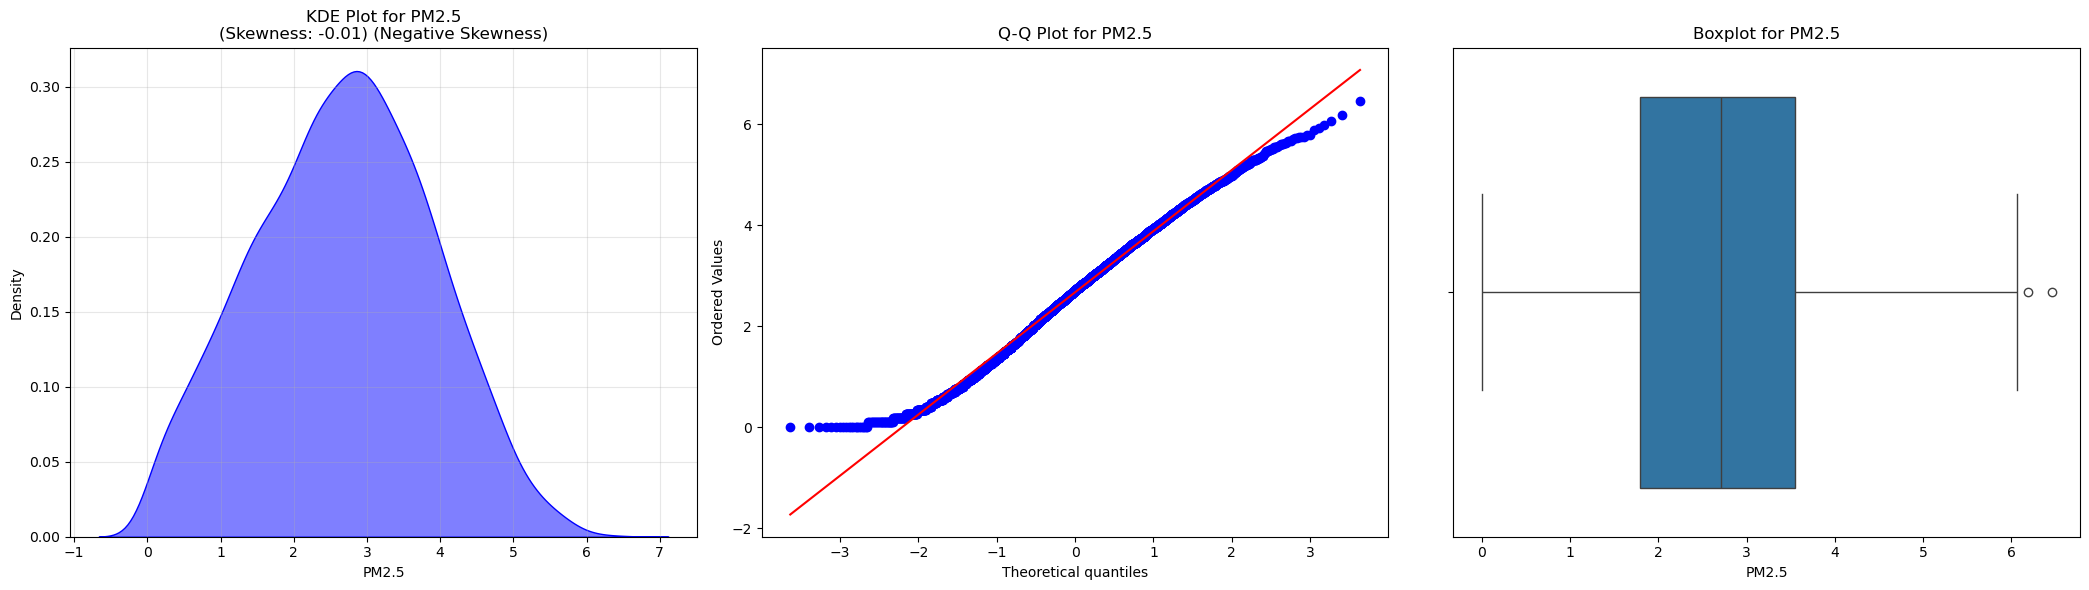

PM10: Skewness = 0.00 (Positive Skewness)


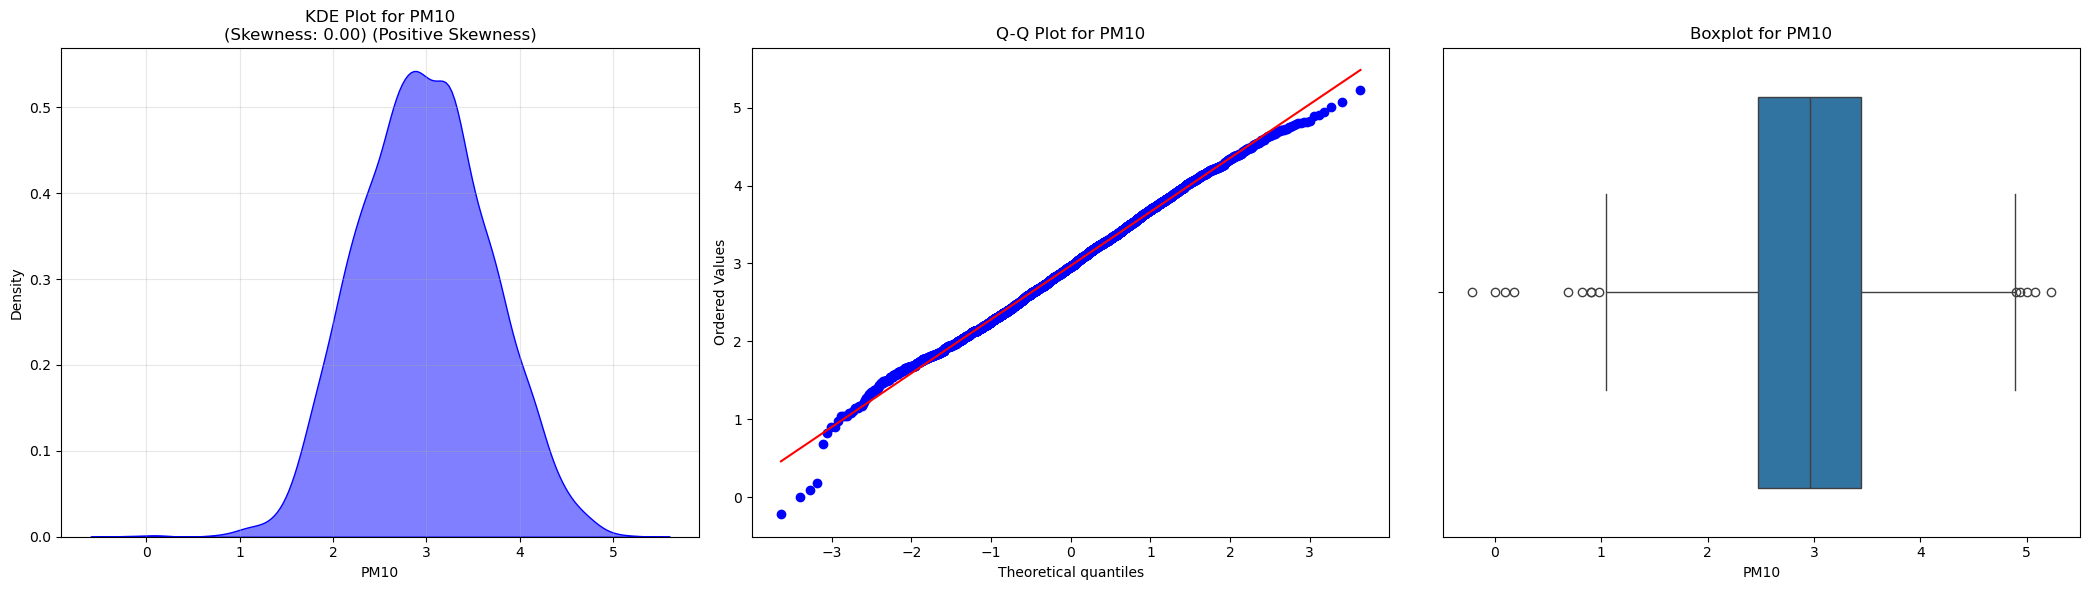

NO2: Skewness = -0.01 (Negative Skewness)


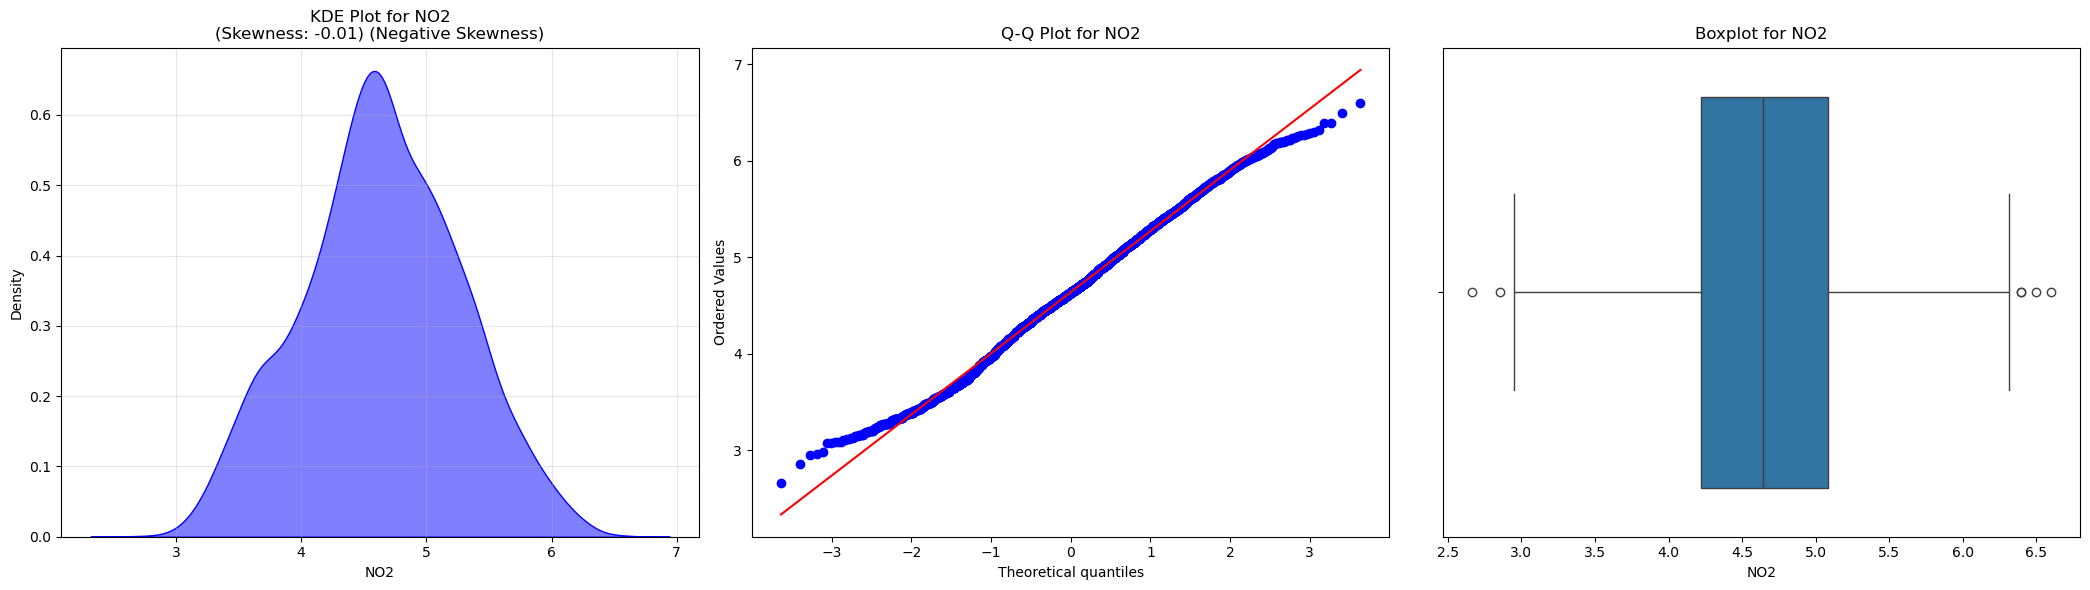

SO2: Skewness = 0.00 (Positive Skewness)


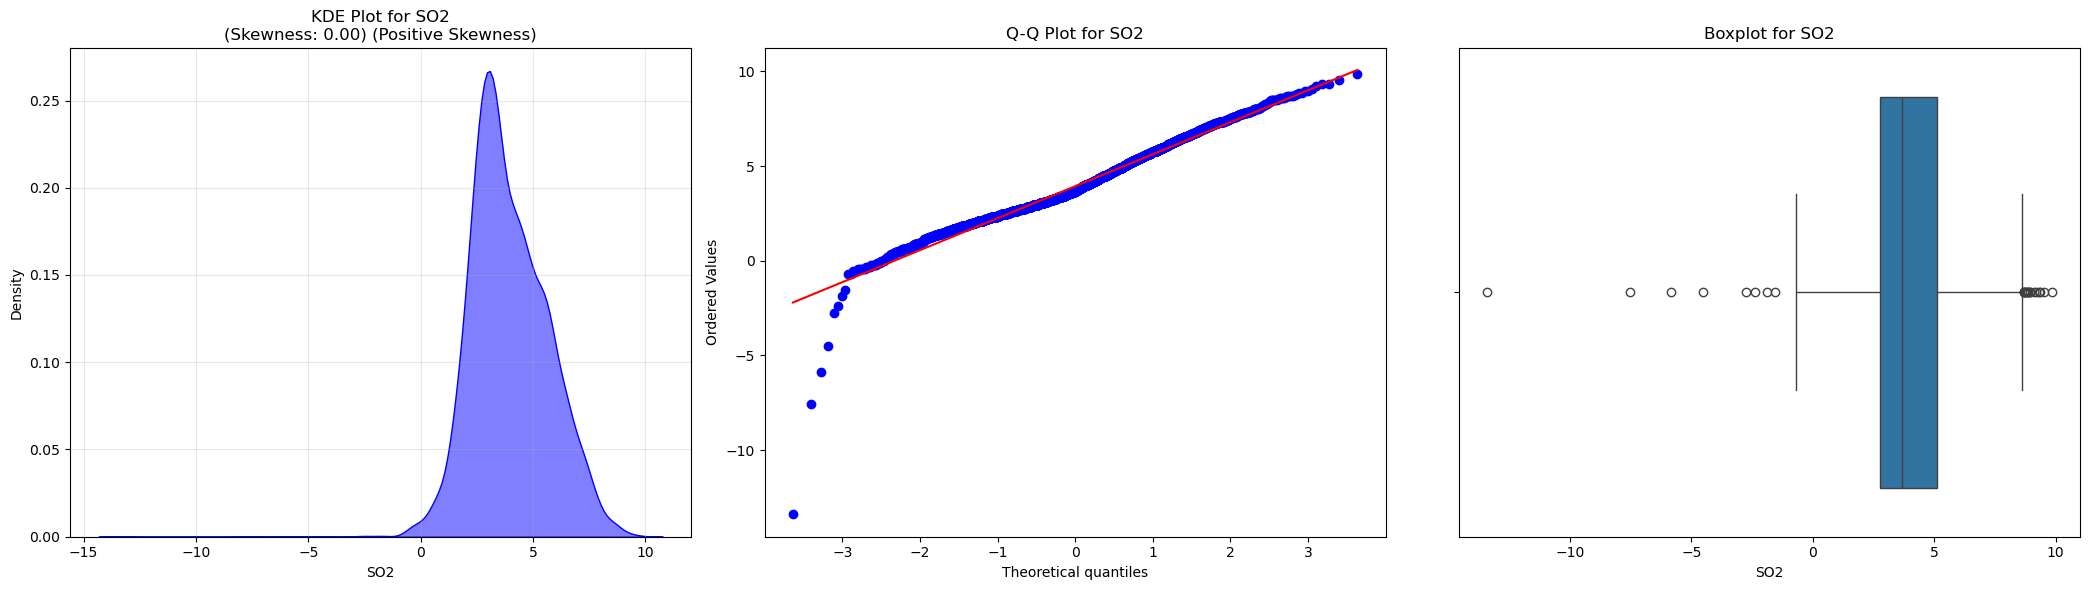

CO: Skewness = 0.11 (Positive Skewness)


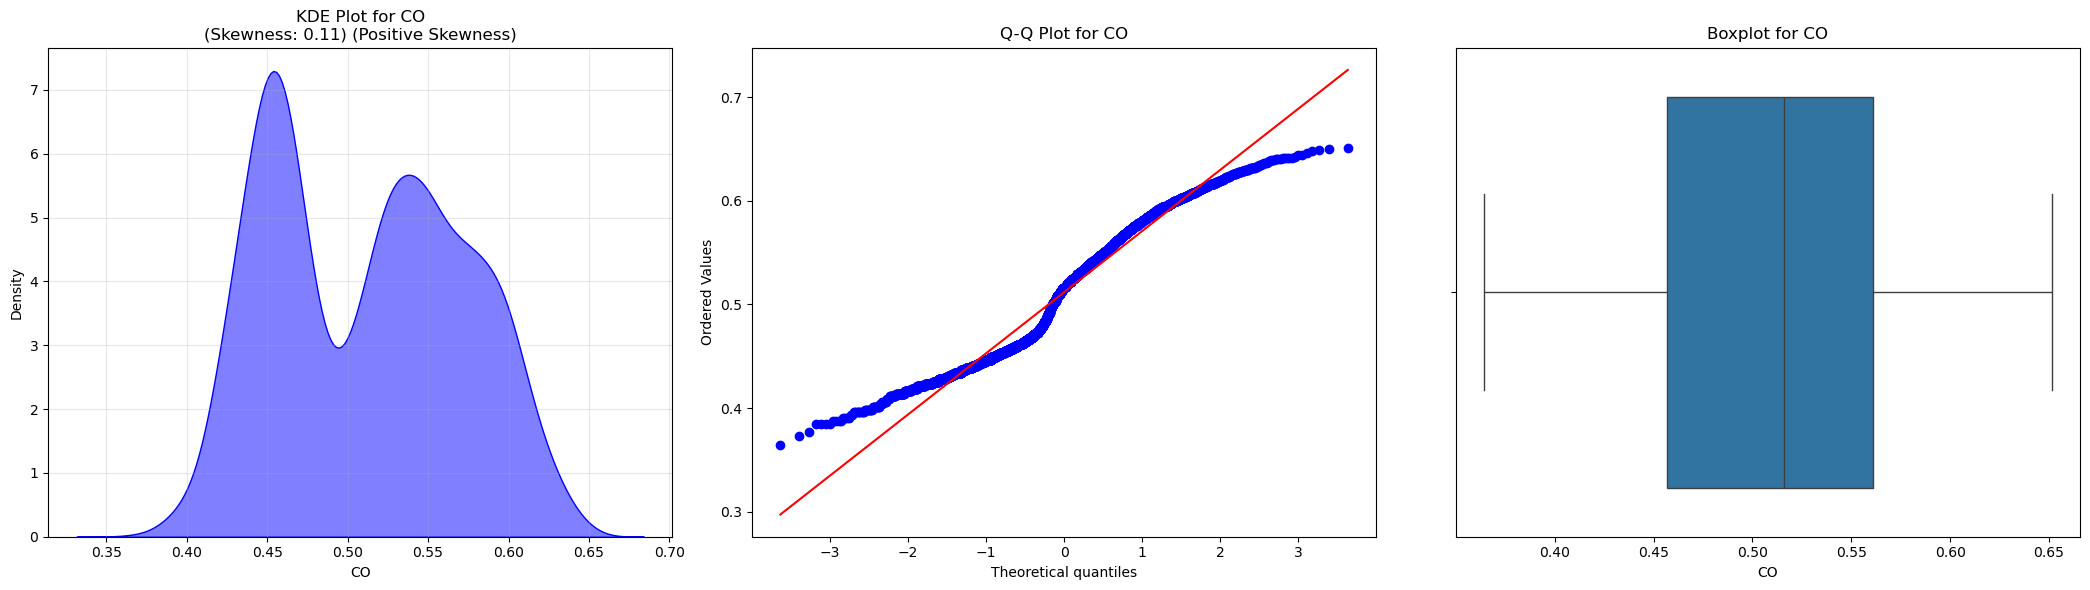

Proximity_to_Industrial_Areas: Skewness = -0.03 (Negative Skewness)


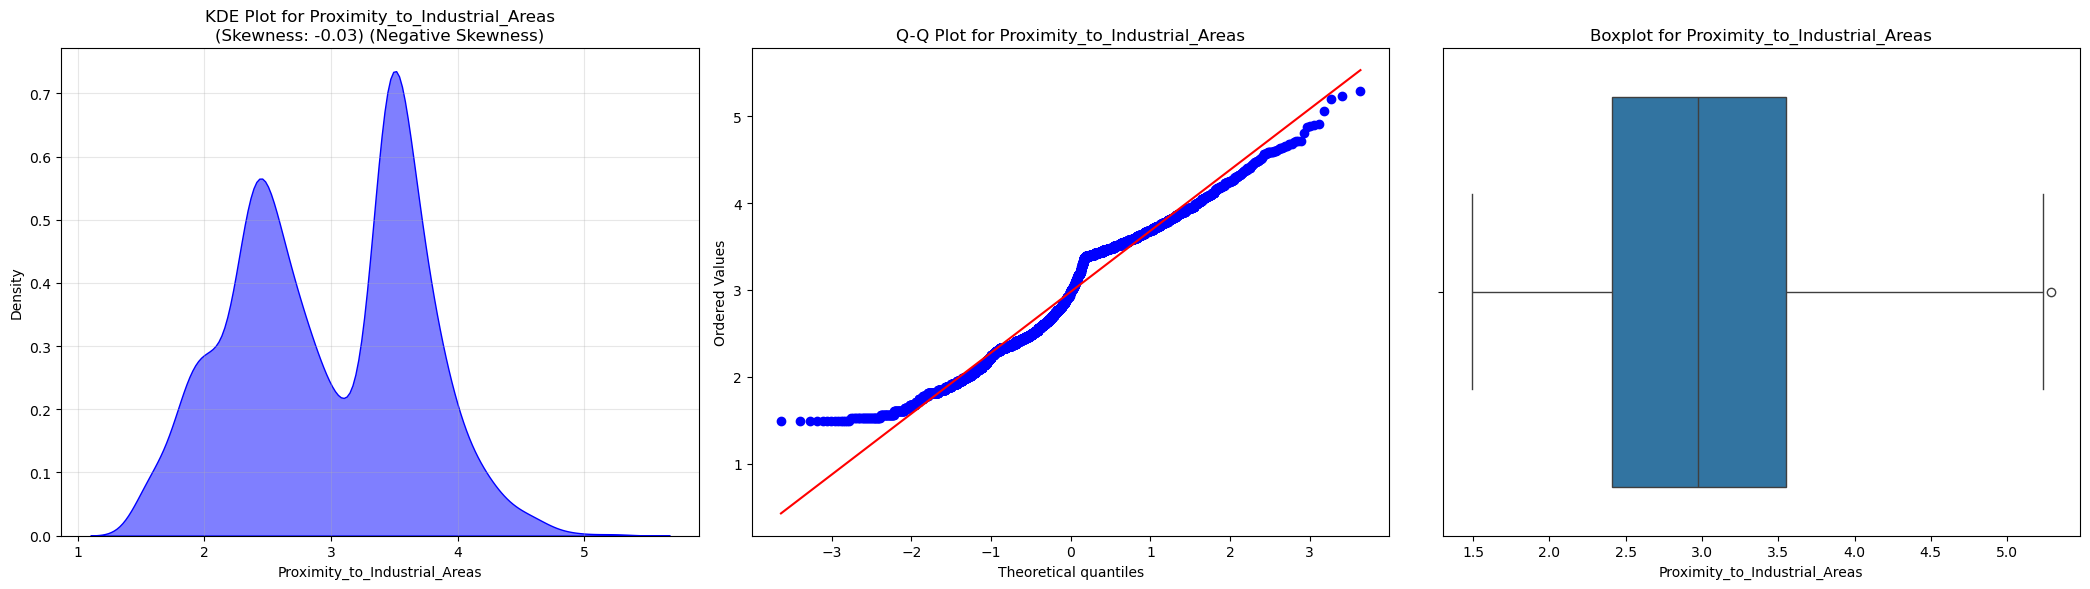

Population_Density: Skewness = -0.04 (Negative Skewness)


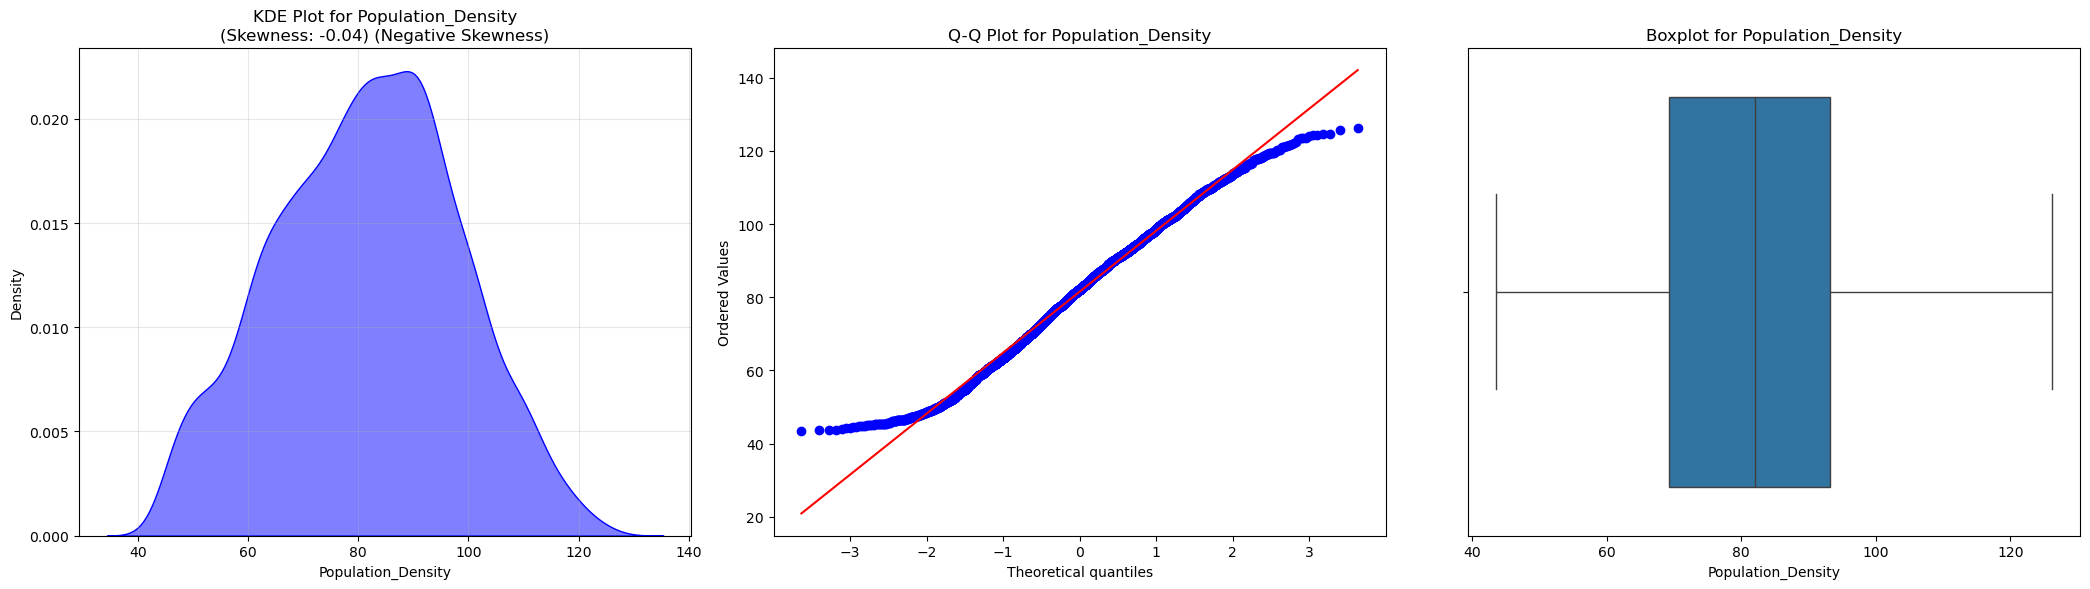

In [13]:
All_plot(X_trd)

In [14]:
# Function to cap outliers using IQR
def cap_outliers_iqr(df):
    df_capped = df.copy()  # Make a copy to avoid modifying the original DataFrame

    # Loop through numeric columns and cap outliers based on IQR
    for column in df_capped.select_dtypes(include=[np.number]).columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds to the lower or upper bound
        df_capped[column] = np.clip(df_capped[column], lower_bound, upper_bound)

    return df_capped

In [15]:
X_new = cap_outliers_iqr(X_trd)

In [16]:
X_new.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,2.069641,11.230647,1.898856,2.797068,4.113002,4.012781,0.549968,2.628726,61.645973
1,2.053064,12.723359,1.225448,2.470271,5.015063,4.145492,0.542038,2.557473,94.277684
2,1.985557,12.646962,3.573179,3.343772,4.571906,4.853780,0.541007,2.355880,95.080059
3,2.038972,9.063016,2.046023,1.922181,3.550549,2.819740,0.477957,3.553046,88.134998
4,2.031624,12.301006,2.162557,2.701023,4.374282,2.924336,0.452784,3.800113,59.598604


Temperature: Skewness = 0.03 (Positive Skewness)


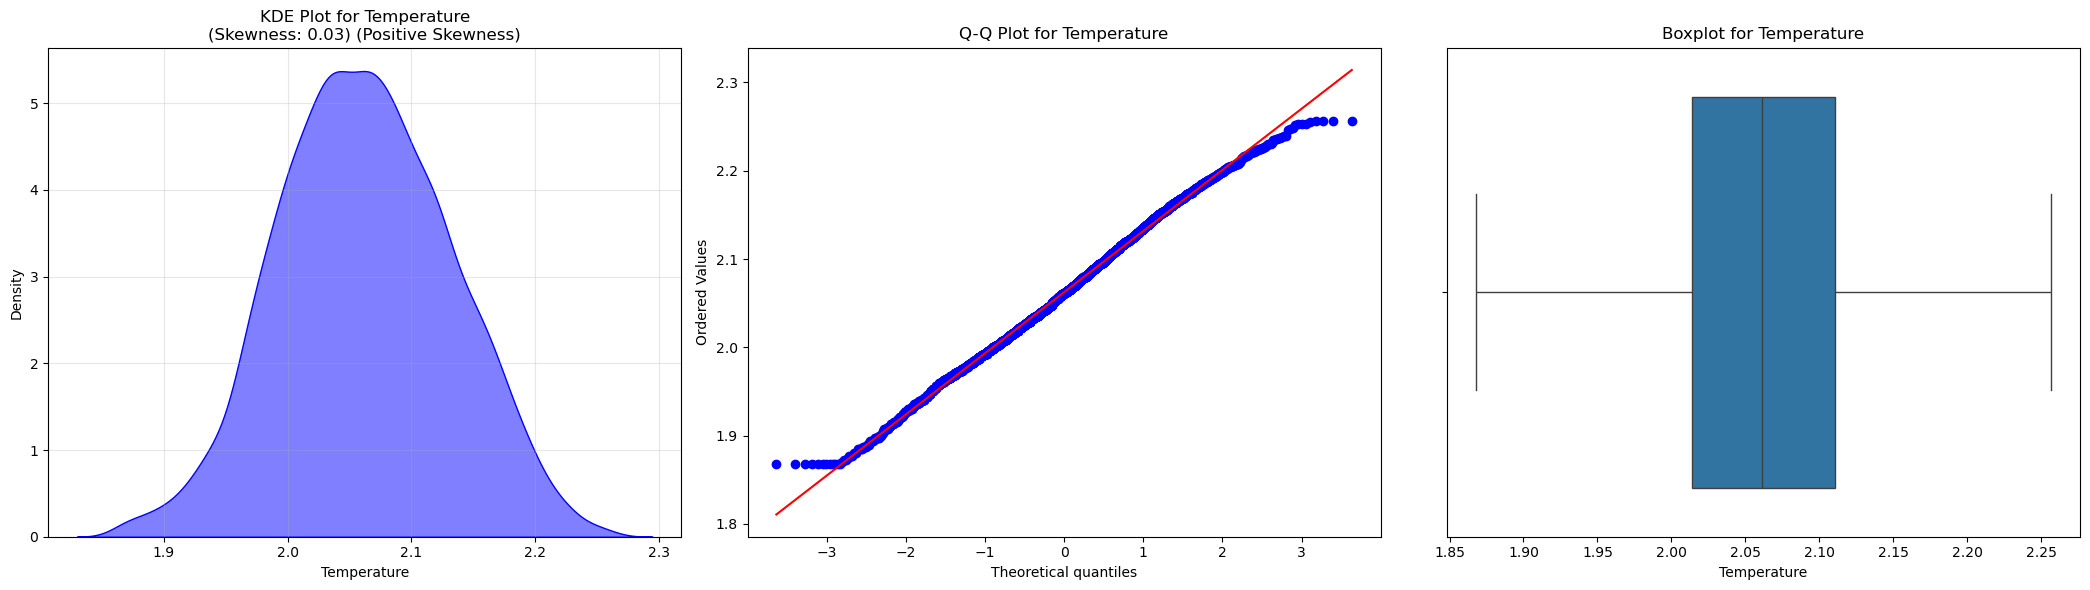

Humidity: Skewness = -0.02 (Negative Skewness)


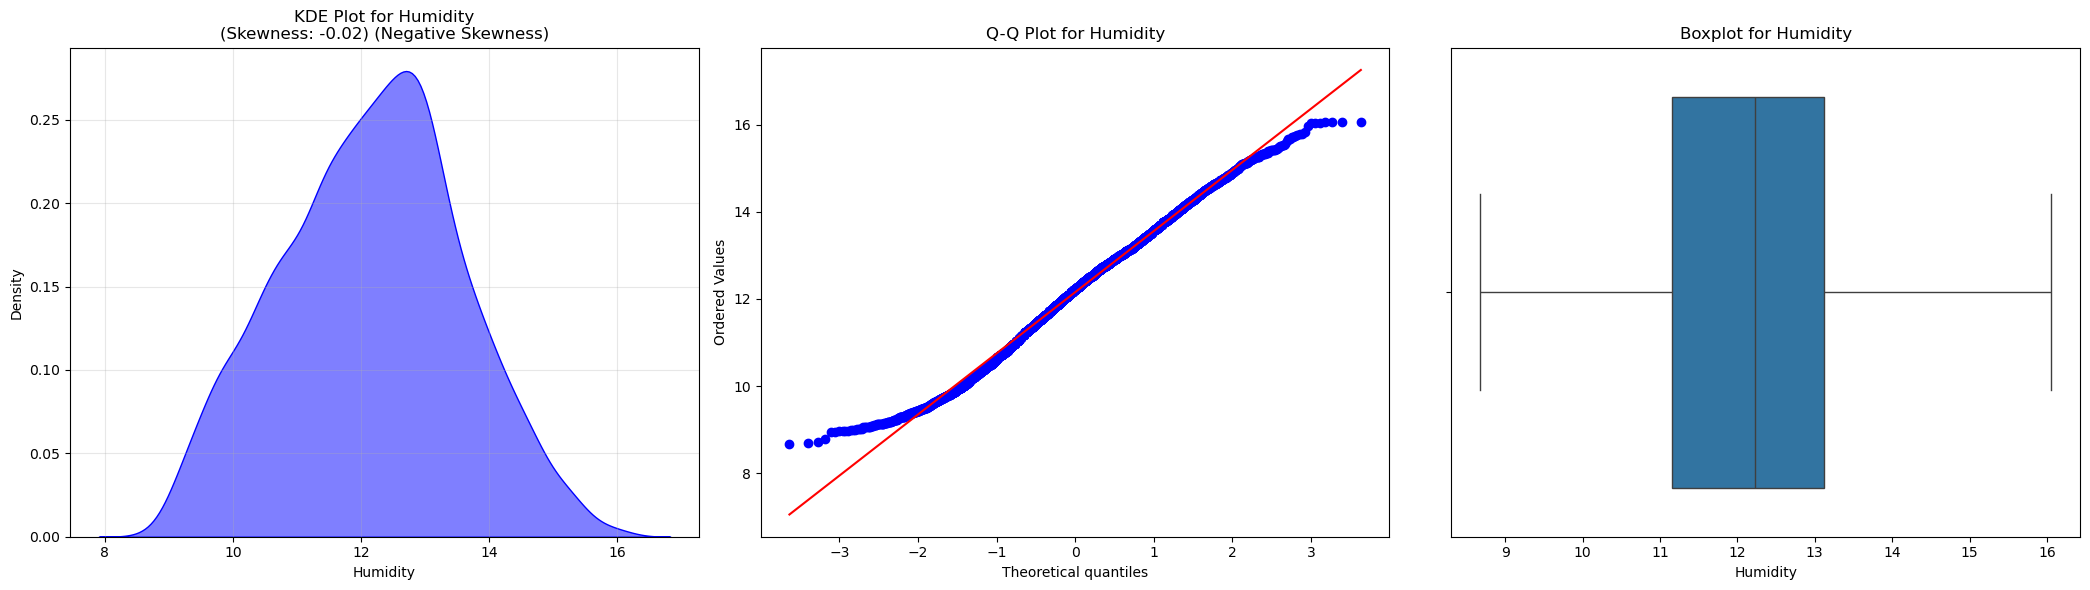

PM2.5: Skewness = -0.01 (Negative Skewness)


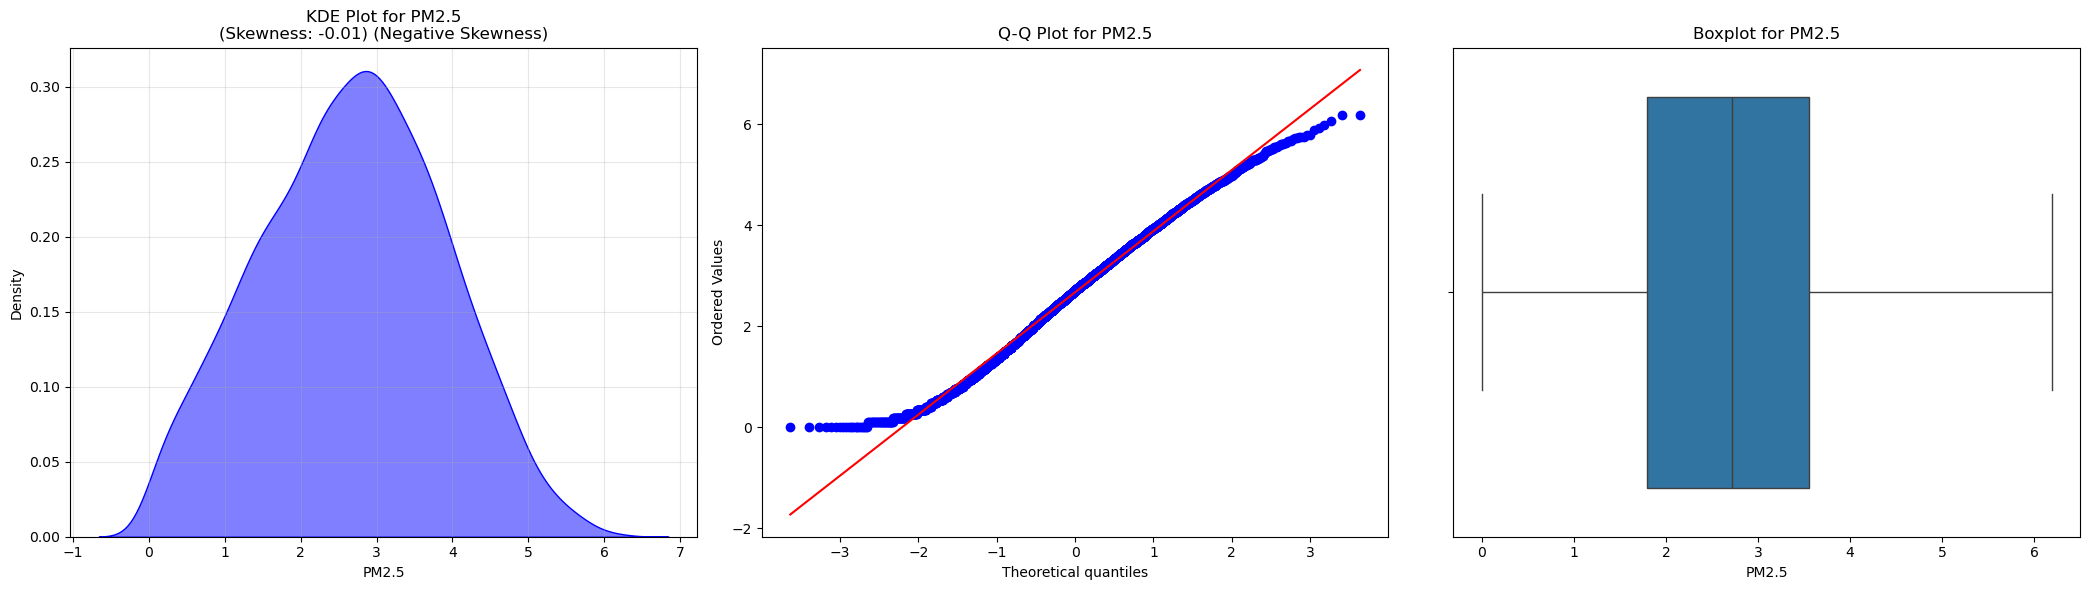

PM10: Skewness = 0.05 (Positive Skewness)


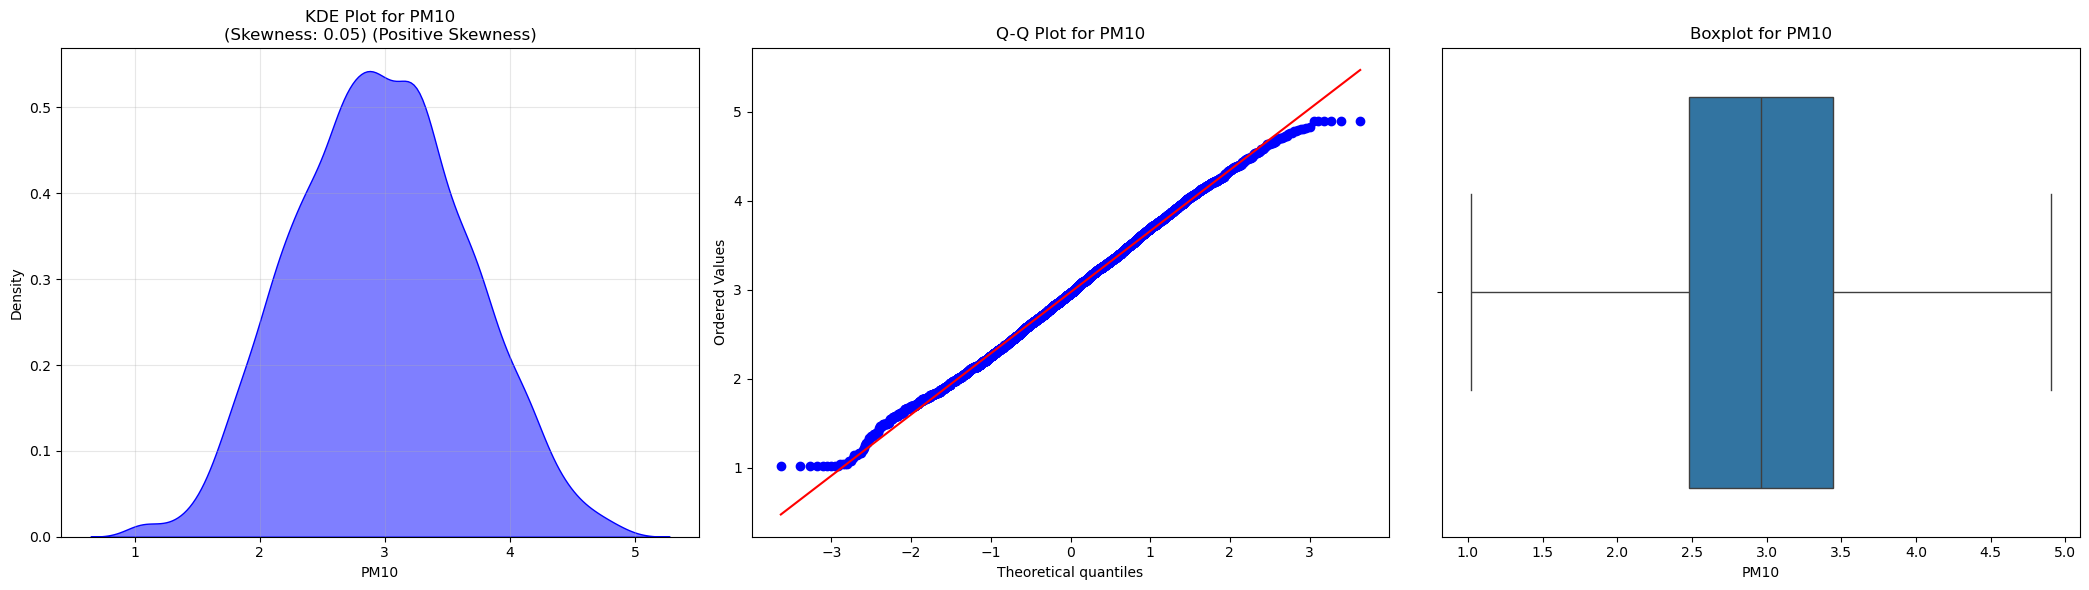

NO2: Skewness = -0.01 (Negative Skewness)


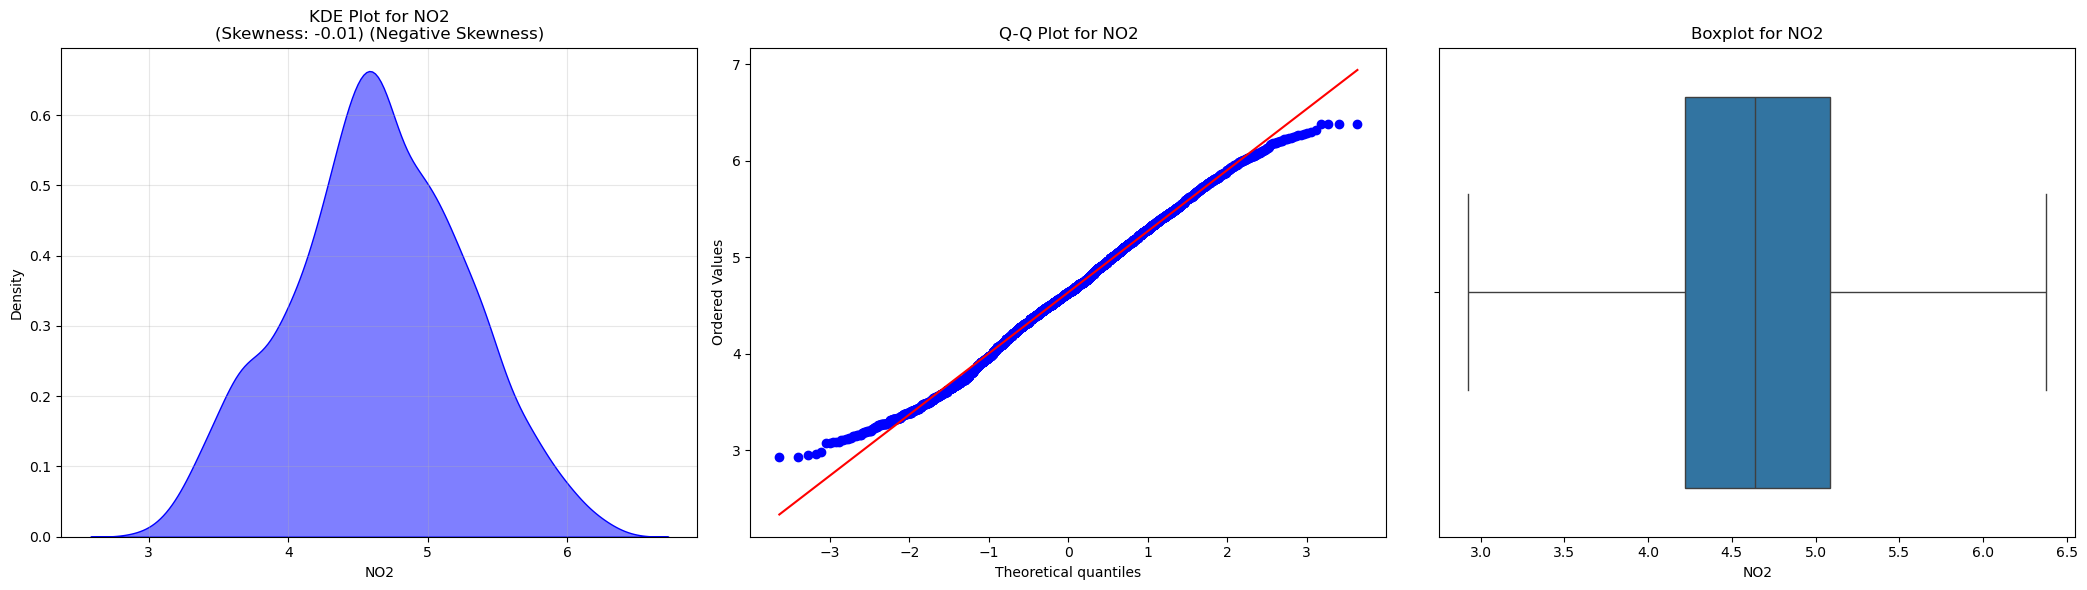

SO2: Skewness = 0.33 (Positive Skewness)


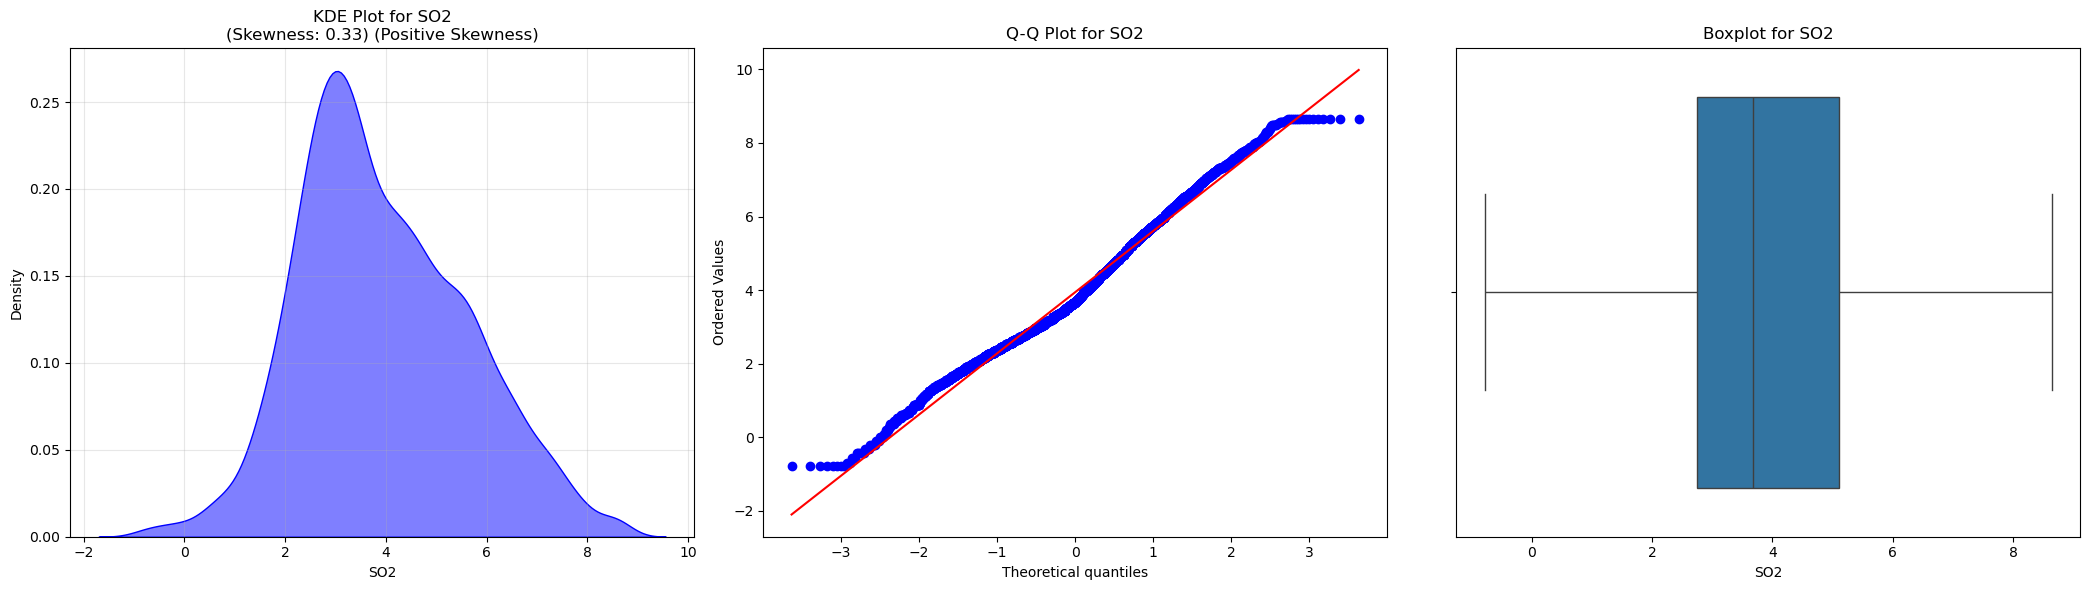

CO: Skewness = 0.11 (Positive Skewness)


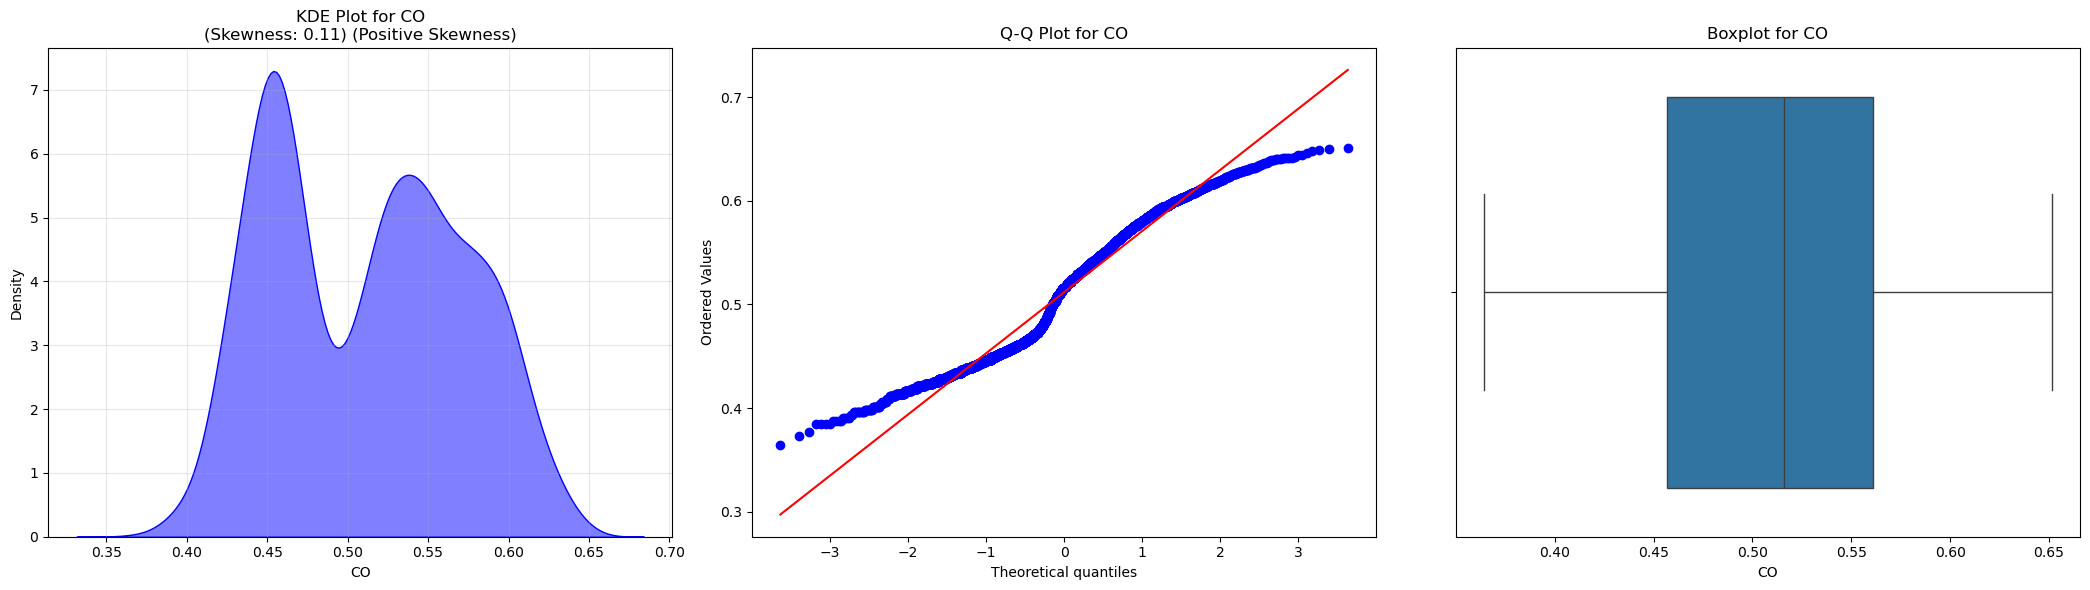

Proximity_to_Industrial_Areas: Skewness = -0.03 (Negative Skewness)


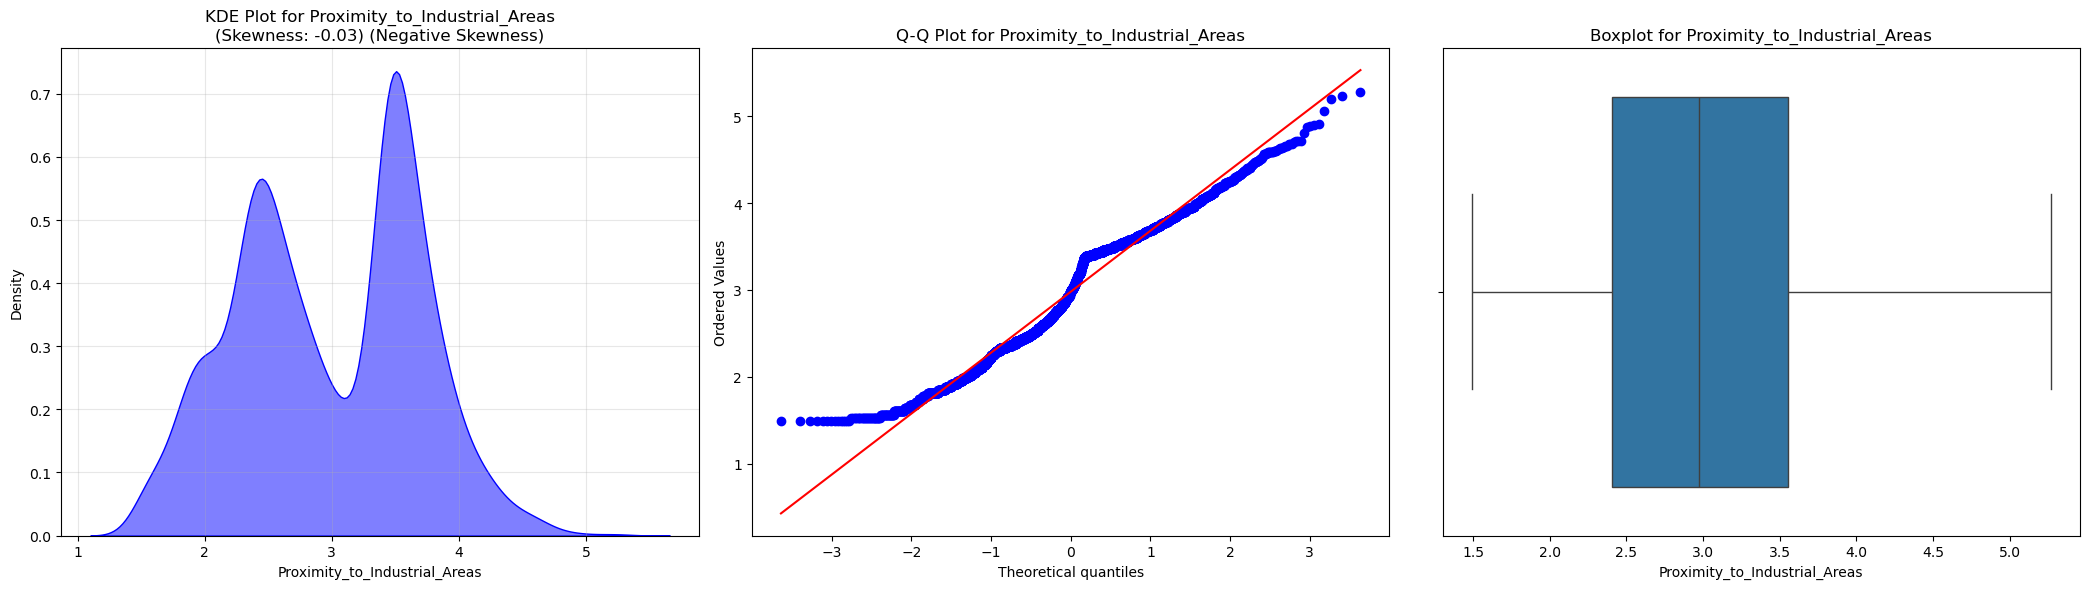

Population_Density: Skewness = -0.04 (Negative Skewness)


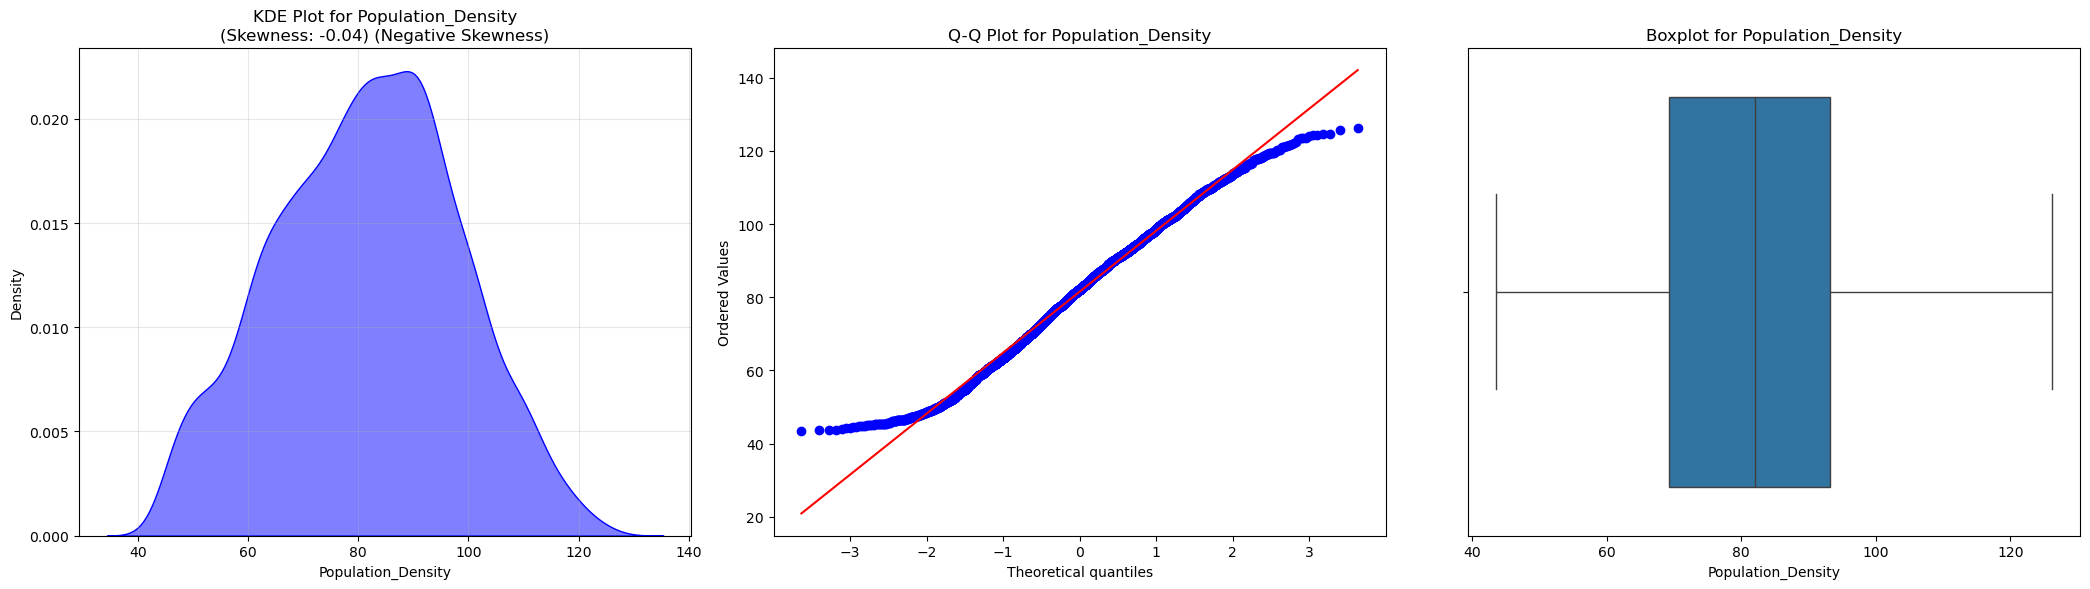

In [17]:
All_plot(X_new)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y, test_size=0.2,random_state=42)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4000, 9), (1000, 9), (4000,), (1000,))

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [21]:
# from tensorflow.keras.utils import to_categorical

# y_train_enco = to_categorical(y_train_enc, num_classes=4)
# y_test_enco = to_categorical(y_test_enc, num_classes=4)

In [22]:
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [23]:
# # Build advanced neural network for 4-class classification
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input shape matches the number of features
    Dense(30, kernel_initializer='he_uniform', activation='relu'),
    Dense(20, kernel_initializer='he_uniform', activation='relu'),
    Dense(15, kernel_initializer='he_uniform', activation='relu'),
    Dense(4, kernel_initializer='glorot_uniform', activation='softmax')  # Output for 4 classes
])

In [24]:
# # Initialising the ANN
# classifier = Sequential()

# # Adding layers
# classifier.add(Dense(units=30, kernel_initializer='he_uniform', activation='relu', input_dim=9))
# classifier.add(Dense(units=20, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=15, kernel_initializer='he_uniform', activation='relu'))

# # Output layer (for multi-class classification)
# classifier.add(Dense(units=len(set(y_train)), kernel_initializer='glorot_uniform', activation='softmax'))

# # Compiling the ANN
# classifier.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # # Training the model
# # model_history = classifier.fit(
# #     X_train,
# #     y_train_enc,  # No need for one-hot encoding
# #     validation_split=0.33,
# #     batch_size=10,
# #     epochs=100
# # )

In [25]:
# Compiling the ANN
model.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              64 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,299 (5.07 KB)

 Trainable params: 1,299 (5.07 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train model
model_history = model.fit(X_train,y_train_enc, epochs=100, batch_size=16, validation_data=(X_test, y_test_enc))

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3674 - loss: 10.9389 - val_accuracy: 0.4540 - val_loss: 1.2933
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4704 - loss: 1.2507 - val_accuracy: 0.5040 - val_loss: 1.1352
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5085 - loss: 1.1279 - val_accuracy: 0.5560 - val_loss: 1.0383
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5605 - loss: 1.0033 - val_accuracy: 0.5720 - val_loss: 0.9606
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5813 - loss: 0.9453 - val_accuracy: 0.5820 - val_loss: 0.9187
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6245 - loss: 0.8122 - val_accuracy: 0.6400 - val_loss: 0.8226
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6595 - loss: 0.7793 - val_accuracy: 0.6540 - val_loss: 0.7401
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7013 - loss: 0.7055 - val_acc

In [29]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 2, 3, 0, 0,
       2, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3, 2, 2, 2, 2, 2, 0, 3, 2, 1, 0,
       0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 0, 3,
       3, 0, 2, 3, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 3, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 1, 2, 3, 2, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 3, 3, 0, 0, 0, 2, 2, 2, 2, 3, 0, 2, 2, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 3, 3, 2, 0,
       0, 3, 2, 2, 2, 2, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0,
       0, 2, 0, 3, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 3, 1, 2, 1, 2, 2, 3, 3,
       3, 3, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 0, 1,
       0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 1, 0, 0, 1, 3, 0, 2, 0, 1,
       0, 2, 3, 3, 2, 0, 2, 0, 2, 2, 1, 3, 2, 0, 3, 0, 1, 0, 0, 2, 2, 0,
       1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2,

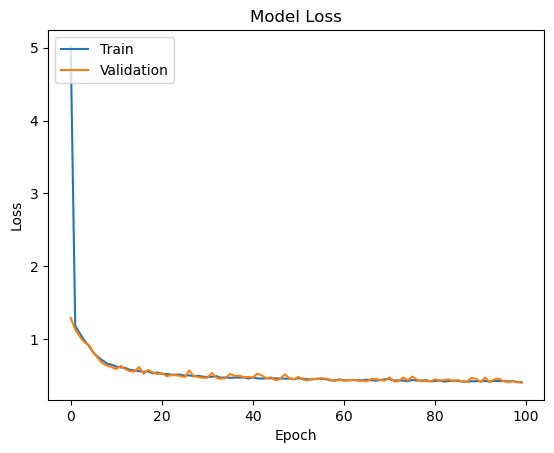

In [31]:
# Plot loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

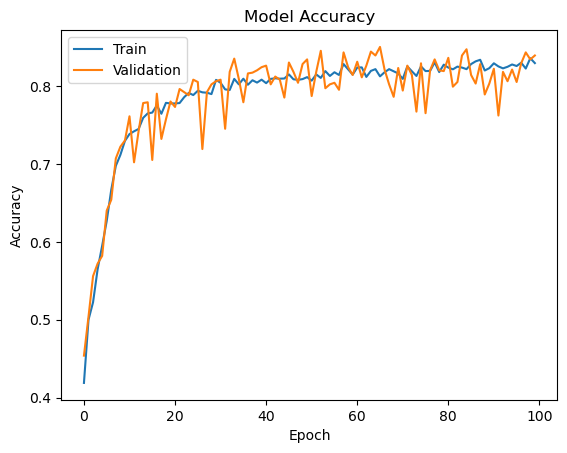

In [33]:
# Plot accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [43]:
from sklearn.metrics import confusion_matrix
score = accuracy_score(y_test_enc, y_pred_classes)
print("Test Accuracy:", score)

cm = confusion_matrix(y_test_enc, y_pred_classes)
cm

Test Accuracy: 0.839


array([[407,   0,   2,   0],
       [  0,  73,   9,  29],
       [ 16,   0, 254,  24],
       [  1,  42,  38, 105]], dtype=int64)

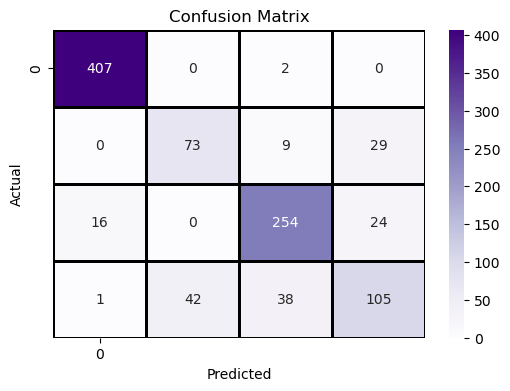

In [51]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',linewidths=1, linecolor='black', xticklabels=4, yticklabels=4)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# using keras Tuner

In [56]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [58]:
def build_model(hp):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Dense(units=hp.Int('input_units', 32, 512, step=32), 
                           activation='relu', input_dim=9))
    
    # Hidden layers with variable count and size
    for i in range(hp.Int('num_layers', 2, 10)):  
        model.add(layers.Dense(units=hp.Int('units_' + str(i), 
                                            min_value=32, 
                                            max_value=512, 
                                            step=32),
                               activation='relu'))
    
    # Output layer for multi-class classification
    num_classes = len(set(y_train))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [60]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Use accuracy for classification
    max_trials=5,
    executions_per_trial=3,
    directory='Project_updated_pollution',
    project_name='updated_pollution'
)

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
input_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [76]:
tuner.search(X_train,y_train_enc,epochs=100,validation_data=(X_test,y_test_enc))

Trial 5 Complete [00h 07m 20s]
val_accuracy: 0.9073333342870077

Best val_accuracy So Far: 0.9073333342870077
Total elapsed time: 00h 19m 45s


Epoch 1/100


C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4163 - loss: 1.2814 - val_accuracy: 0.7130 - val_loss: 0.6568
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7038 - loss: 0.6727 - val_accuracy: 0.7910 - val_loss: 0.5313
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7607 - loss: 0.5740 - val_accuracy: 0.8170 - val_loss: 0.4751
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7406 - loss: 0.6102 - val_accuracy: 0.8090 - val_loss: 0.4685
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7885 - loss: 0.5341 - val_accuracy: 0.8230 - val_loss: 0.4542
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7962 - loss: 0.5043 - val_accuracy: 0.8370 - val_loss: 0.4431
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8027 - loss: 0.4761 - val_accuracy: 0.8090 - val_loss: 0.4445
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8217 - loss: 0.4398 - val_accuracy: 0.7970

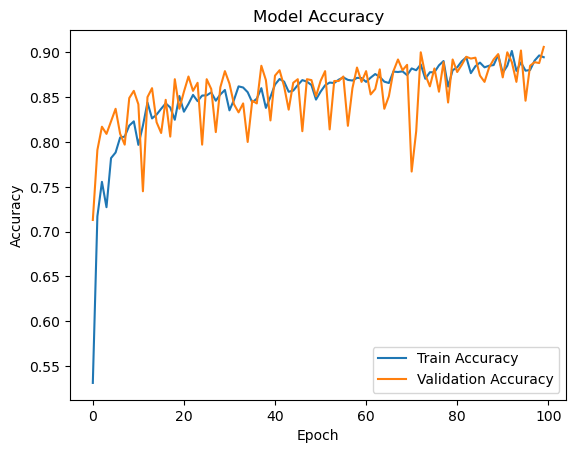

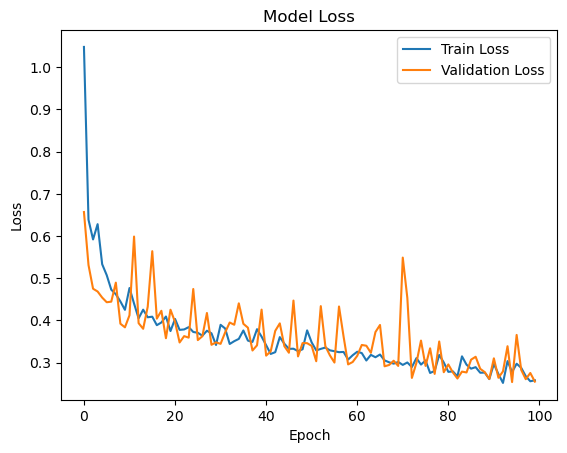

In [83]:
import matplotlib.pyplot as plt

# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=2)[0]

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train_enc,
    epochs=100,
    validation_data=(X_test, y_test_enc)
)
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [85]:
y_pred_best = best_model.predict(X_test)
y_pred_best_classes = np.argmax(y_pred_best, axis=1)
y_pred_best_classes

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 2, 3, 0, 0,
       2, 2, 0, 3, 0, 0, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 1, 0,
       0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 3, 0, 0, 0, 0, 2, 0, 3,
       3, 0, 2, 3, 0, 0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 2, 3, 0, 2, 2, 3, 2,
       2, 1, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 1, 2, 3, 2, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 3, 3, 0, 0, 0, 2, 2, 2, 2, 3, 0, 2, 2, 0, 0, 2, 0,
       3, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 3, 3, 2, 0,
       0, 3, 2, 2, 2, 2, 1, 0, 2, 1, 3, 3, 0, 0, 0, 0, 2, 3, 0, 3, 0, 0,
       0, 2, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 3, 3,
       3, 3, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 3, 0, 1,
       0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 2, 2, 0,
       3, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 3, 0, 0, 1, 3, 0, 2, 0, 1,
       0, 2, 3, 3, 2, 0, 2, 2, 2, 0, 3, 3, 2, 0, 3, 0, 1, 0, 0, 2, 2, 0,
       3, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,

In [93]:
from sklearn.metrics import confusion_matrix
score = accuracy_score(y_test_enc, y_pred_best_classes)
print("Test Accuracy:", score)

cm1 = confusion_matrix(y_test_enc, y_pred_best_classes)
cm1

Test Accuracy: 0.906


array([[409,   0,   0,   0],
       [  0,  77,   1,  33],
       [  6,   0, 266,  22],
       [  0,   7,  25, 154]], dtype=int64)

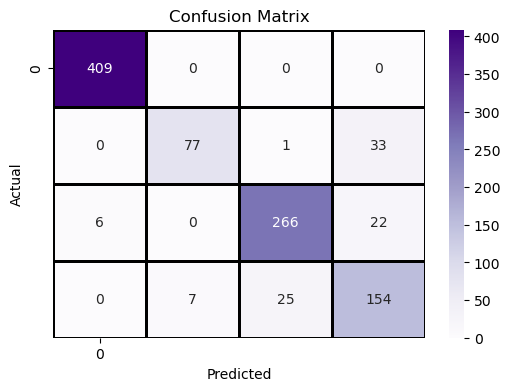

In [95]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Purples',linewidths=1, linecolor='black', xticklabels=4, yticklabels=4)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()